In [1]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
%matplotlib inline

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknow sysyem... sorry~')

match_20=pd.read_csv('D:/Final_Project/data/match_20_final_data.csv',index_col=0)
match_21=pd.read_csv('D:/Final_Project/data/match_21_final_data.csv',index_col=0)

# preprocessing
* 단일모드 게임 삭제 (챔피언이 같은 행 삭제)
* 칼바람나락 게임 삭제 (스펠값이 Nan 값 삭제)  
* KDA열 추가 및 퍼펙트 처리

In [2]:
match_20

,play_time,result,blue_1_champ,blue_1_spell1,blue_1_spell2,blue_1_kill,blue_1_death,blue_1_assist,blue_1_totaldamage_dealt,blue_1_totaldamage_taken,...,red_5_champ,red_5_spell1,red_5_spell2,red_5_kill,red_5_death,red_5_assist,red_5_totaldamage_dealt,red_5_totaldamage_taken,red_5_visionscore,red_5_cs
0,1323,0,Leblanc,Cleanse,Flash,3,6,3,71369,17255,...,RekSai,Smite,Flash,7,2,13,146312,25898,36,21
1,1317,1,Lucian,Ignite,Flash,3,5,2,91081,15543,...,Sivir,Flash,Heal,0,2,0,83071,9241,10,182
2,932,0,Senna,Flash,Exhaust,0,4,1,19098,6494,...,Mordekaiser,Flash,Teleport,1,1,3,67175,6721,12,129
3,2098,0,Nautilus,Flash,Ignite,4,9,11,35821,27058,...,Yasuo,Flash,Cleanse,6,7,13,180574,25018,37,217
4,2344,1,Kaisa,Flash,Heal,7,12,12,269340,33275,...,Yuumi,Exhaust,Heal,3,3,34,45127,5891,91,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26843,1468,0,Gragas,Flash,Smite,3,6,11,111109,23414,...,Olaf,Flash,Smite,6,5,6,151357,28571,35,39
26844,970,0,Yuumi,Ignite,Exhaust,2,6,17,19435,8042,...,Skarner,Flash,Smite,5,0,9,102880,10950,11,39
26845,1480,0,Syndra,Heal,Flash,1,3,3,73126,11044,...,Kayn,Smite,Flash,2,5,7,129053,21894,31,10
26846,1837,1,JarvanIV,Flash,Smite,3,6,17,122445,31571,...,Rumble,Teleport,Flash,3,6,7,149570,25492,18,186


In [3]:
#단일모드 처리
drop_list=list(match_20[match_20['blue_1_champ']==match_20['blue_2_champ']].index)
match_20.drop(drop_list,0,inplace=True)

In [4]:
#칼바람나락 처리
drop_list=list(match_20[(match_20['blue_1_spell1'].isna())|(match_20['blue_1_spell2'].isna())].index)
match_20.drop(drop_list,0,inplace=True)

In [5]:
match_20.reset_index(drop=True,inplace=True)
match_20

,play_time,result,blue_1_champ,blue_1_spell1,blue_1_spell2,blue_1_kill,blue_1_death,blue_1_assist,blue_1_totaldamage_dealt,blue_1_totaldamage_taken,...,red_5_champ,red_5_spell1,red_5_spell2,red_5_kill,red_5_death,red_5_assist,red_5_totaldamage_dealt,red_5_totaldamage_taken,red_5_visionscore,red_5_cs
0,1323,0,Leblanc,Cleanse,Flash,3,6,3,71369,17255,...,RekSai,Smite,Flash,7,2,13,146312,25898,36,21
1,1317,1,Lucian,Ignite,Flash,3,5,2,91081,15543,...,Sivir,Flash,Heal,0,2,0,83071,9241,10,182
2,932,0,Senna,Flash,Exhaust,0,4,1,19098,6494,...,Mordekaiser,Flash,Teleport,1,1,3,67175,6721,12,129
3,2098,0,Nautilus,Flash,Ignite,4,9,11,35821,27058,...,Yasuo,Flash,Cleanse,6,7,13,180574,25018,37,217
4,2344,1,Kaisa,Flash,Heal,7,12,12,269340,33275,...,Yuumi,Exhaust,Heal,3,3,34,45127,5891,91,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25700,1468,0,Gragas,Flash,Smite,3,6,11,111109,23414,...,Olaf,Flash,Smite,6,5,6,151357,28571,35,39
25701,970,0,Yuumi,Ignite,Exhaust,2,6,17,19435,8042,...,Skarner,Flash,Smite,5,0,9,102880,10950,11,39
25702,1480,0,Syndra,Heal,Flash,1,3,3,73126,11044,...,Kayn,Smite,Flash,2,5,7,129053,21894,31,10
25703,1837,1,JarvanIV,Flash,Smite,3,6,17,122445,31571,...,Rumble,Teleport,Flash,3,6,7,149570,25492,18,186


In [6]:
#KDA
match_20['blue_1_kda']=(match_20['blue_1_kill']+match_20['blue_1_assist'])/match_20['blue_1_death']
match_20['blue_2_kda']=(match_20['blue_2_kill']+match_20['blue_2_assist'])/match_20['blue_2_death']
match_20['blue_3_kda']=(match_20['blue_3_kill']+match_20['blue_3_assist'])/match_20['blue_3_death']
match_20['blue_4_kda']=(match_20['blue_4_kill']+match_20['blue_4_assist'])/match_20['blue_4_death']
match_20['blue_5_kda']=(match_20['blue_5_kill']+match_20['blue_5_assist'])/match_20['blue_5_death']

match_20['red_1_kda']=(match_20['red_1_kill']+match_20['red_1_assist'])/match_20['red_1_death']
match_20['red_2_kda']=(match_20['red_2_kill']+match_20['red_2_assist'])/match_20['red_2_death']
match_20['red_3_kda']=(match_20['red_3_kill']+match_20['red_3_assist'])/match_20['red_3_death']
match_20['red_4_kda']=(match_20['red_4_kill']+match_20['red_4_assist'])/match_20['red_4_death']
match_20['red_5_kda']=(match_20['red_5_kill']+match_20['red_5_assist'])/match_20['red_5_death']

#KDA가 퍼펙트인 경우
match_20.loc[match_20.blue_1_kda==np.inf,'blue_1_kda']=(match_20['blue_1_kill']+match_20['blue_1_assist'])*1.2
match_20.loc[match_20.blue_2_kda==np.inf,'blue_2_kda']=(match_20['blue_2_kill']+match_20['blue_2_assist'])*1.2
match_20.loc[match_20.blue_3_kda==np.inf,'blue_3_kda']=(match_20['blue_3_kill']+match_20['blue_3_assist'])*1.2
match_20.loc[match_20.blue_4_kda==np.inf,'blue_4_kda']=(match_20['blue_4_kill']+match_20['blue_4_assist'])*1.2
match_20.loc[match_20.blue_5_kda==np.inf,'blue_5_kda']=(match_20['blue_5_kill']+match_20['blue_5_assist'])*1.2

match_20.loc[match_20.red_1_kda==np.inf,'red_1_kda']=(match_20['red_1_kill']+match_20['red_1_assist'])*1.2
match_20.loc[match_20.red_2_kda==np.inf,'red_2_kda']=(match_20['red_2_kill']+match_20['red_2_assist'])*1.2
match_20.loc[match_20.red_3_kda==np.inf,'red_3_kda']=(match_20['red_3_kill']+match_20['red_3_assist'])*1.2
match_20.loc[match_20.red_4_kda==np.inf,'red_4_kda']=(match_20['red_4_kill']+match_20['red_4_assist'])*1.2
match_20.loc[match_20.red_5_kda==np.inf,'red_5_kda']=(match_20['red_5_kill']+match_20['red_5_assist'])*1.2

In [7]:
#탈주자 처리: 킬 데스 어시 전부 0인 경우
match_20.replace(np.nan,0,inplace=True)
match_20

,play_time,result,blue_1_champ,blue_1_spell1,blue_1_spell2,blue_1_kill,blue_1_death,blue_1_assist,blue_1_totaldamage_dealt,blue_1_totaldamage_taken,...,blue_1_kda,blue_2_kda,blue_3_kda,blue_4_kda,blue_5_kda,red_1_kda,red_2_kda,red_3_kda,red_4_kda,red_5_kda
0,1323,0,Leblanc,Cleanse,Flash,3,6,3,71369,17255,...,1.000000,1.666667,1.200000,1.142857,1.000000,7.000000,17.000000,4.250000,4.250000,10.000000
1,1317,1,Lucian,Ignite,Flash,3,5,2,91081,15543,...,1.000000,16.800000,14.400000,10.800000,3.333333,0.250000,0.666667,2.000000,1.250000,0.000000
2,932,0,Senna,Flash,Exhaust,0,4,1,19098,6494,...,0.250000,0.800000,0.400000,0.500000,2.000000,14.400000,8.000000,8.000000,4.000000,4.000000
3,2098,0,Nautilus,Flash,Ignite,4,9,11,35821,27058,...,1.666667,2.833333,1.857143,2.333333,1.500000,4.000000,6.666667,6.250000,3.333333,2.714286
4,2344,1,Kaisa,Flash,Heal,7,12,12,269340,33275,...,1.583333,1.166667,2.000000,4.000000,2.500000,2.125000,4.600000,6.666667,3.250000,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25700,1468,0,Gragas,Flash,Smite,3,6,11,111109,23414,...,2.333333,3.400000,2.833333,2.500000,2.200000,3.000000,9.000000,2.250000,1.428571,2.400000
25701,970,0,Yuumi,Ignite,Exhaust,2,6,17,19435,8042,...,3.166667,0.666667,0.833333,0.818182,3.285714,1.600000,1.300000,2.625000,2.500000,16.800000
25702,1480,0,Syndra,Heal,Flash,1,3,3,73126,11044,...,1.333333,2.000000,1.166667,1.500000,2.666667,7.000000,1.500000,13.000000,6.000000,1.800000
25703,1837,1,JarvanIV,Flash,Smite,3,6,17,122445,31571,...,3.333333,11.000000,5.333333,4.200000,6.333333,1.285714,0.857143,3.250000,1.250000,1.666667


In [8]:
match_21

,play_time,result,blue_1_champ,blue_1_spell1,blue_1_spell2,blue_1_kill,blue_1_death,blue_1_assist,blue_1_totaldamage_dealt,blue_1_totaldamage_taken,...,red_5_champ,red_5_spell1,red_5_spell2,red_5_kill,red_5_death,red_5_assist,red_5_totaldamage_dealt,red_5_totaldamage_taken,red_5_visionscore,red_5_cs
0,2241,0,Leblanc,Teleport,Flash,4,5,18,156358,37416,...,LeeSin,Smite,Flash,9,8,11,143137,51158,47,31
1,1022,0,Ryze,Flash,Teleport,0,1,0,73834,6213,...,Nautilus,Ignite,Flash,2,0,9,20522,4193,32,35
2,2056,1,DrMundo,Teleport,Flash,1,5,11,148044,32263,...,Leblanc,Teleport,Flash,10,7,9,139167,31081,28,164
3,1378,1,Yone,Teleport,Flash,11,4,4,152755,17974,...,Trundle,Smite,Flash,2,8,4,80229,30363,31,16
4,1265,1,Aphelios,Cleanse,Flash,5,1,15,108625,12931,...,Zoe,Ignite,Flash,2,3,4,73738,8879,21,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13368,1363,1,Thresh,Ignite,Flash,2,4,12,16639,8032,...,Syndra,Flash,Teleport,2,2,5,85185,11636,8,166
13369,1553,1,Irelia,Flash,Teleport,10,4,2,213285,23667,...,Renekton,Flash,Teleport,2,3,2,108021,29559,24,193
13370,1143,1,Ziggs,Flash,Teleport,5,2,8,102764,6862,...,Kled,Ignite,Flash,0,7,2,22963,20706,11,50
13371,1261,0,Samira,Cleanse,Flash,4,6,3,80037,12581,...,Ziggs,Teleport,Flash,17,2,7,154117,8985,27,168


In [9]:
#단일모드 처리
drop_list=list(match_21[match_21['blue_1_champ']==match_21['blue_2_champ']].index)
match_21.drop(drop_list,0,inplace=True)

In [10]:
#칼바람나락 처리
drop_list=list(match_21[(match_21['blue_1_spell1'].isna())|(match_21['blue_1_spell2'].isna())].index)
match_21.drop(drop_list,0,inplace=True)

In [11]:
match_21.reset_index(drop=True,inplace=True)
match_21

,play_time,result,blue_1_champ,blue_1_spell1,blue_1_spell2,blue_1_kill,blue_1_death,blue_1_assist,blue_1_totaldamage_dealt,blue_1_totaldamage_taken,...,red_5_champ,red_5_spell1,red_5_spell2,red_5_kill,red_5_death,red_5_assist,red_5_totaldamage_dealt,red_5_totaldamage_taken,red_5_visionscore,red_5_cs
0,2241,0,Leblanc,Teleport,Flash,4,5,18,156358,37416,...,LeeSin,Smite,Flash,9,8,11,143137,51158,47,31
1,1022,0,Ryze,Flash,Teleport,0,1,0,73834,6213,...,Nautilus,Ignite,Flash,2,0,9,20522,4193,32,35
2,2056,1,DrMundo,Teleport,Flash,1,5,11,148044,32263,...,Leblanc,Teleport,Flash,10,7,9,139167,31081,28,164
3,1378,1,Yone,Teleport,Flash,11,4,4,152755,17974,...,Trundle,Smite,Flash,2,8,4,80229,30363,31,16
4,1265,1,Aphelios,Cleanse,Flash,5,1,15,108625,12931,...,Zoe,Ignite,Flash,2,3,4,73738,8879,21,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11718,1363,1,Thresh,Ignite,Flash,2,4,12,16639,8032,...,Syndra,Flash,Teleport,2,2,5,85185,11636,8,166
11719,1553,1,Irelia,Flash,Teleport,10,4,2,213285,23667,...,Renekton,Flash,Teleport,2,3,2,108021,29559,24,193
11720,1143,1,Ziggs,Flash,Teleport,5,2,8,102764,6862,...,Kled,Ignite,Flash,0,7,2,22963,20706,11,50
11721,1261,0,Samira,Cleanse,Flash,4,6,3,80037,12581,...,Ziggs,Teleport,Flash,17,2,7,154117,8985,27,168


In [12]:
#KDA
match_21['blue_1_kda']=(match_21['blue_1_kill']+match_21['blue_1_assist'])/match_21['blue_1_death']
match_21['blue_2_kda']=(match_21['blue_2_kill']+match_21['blue_2_assist'])/match_21['blue_2_death']
match_21['blue_3_kda']=(match_21['blue_3_kill']+match_21['blue_3_assist'])/match_21['blue_3_death']
match_21['blue_4_kda']=(match_21['blue_4_kill']+match_21['blue_4_assist'])/match_21['blue_4_death']
match_21['blue_5_kda']=(match_21['blue_5_kill']+match_21['blue_5_assist'])/match_21['blue_5_death']

match_21['red_1_kda']=(match_21['red_1_kill']+match_21['red_1_assist'])/match_21['red_1_death']
match_21['red_2_kda']=(match_21['red_2_kill']+match_21['red_2_assist'])/match_21['red_2_death']
match_21['red_3_kda']=(match_21['red_3_kill']+match_21['red_3_assist'])/match_21['red_3_death']
match_21['red_4_kda']=(match_21['red_4_kill']+match_21['red_4_assist'])/match_21['red_4_death']
match_21['red_5_kda']=(match_21['red_5_kill']+match_21['red_5_assist'])/match_21['red_5_death']

#KDA가 퍼펙트인 경우
match_21.loc[match_21.blue_1_kda==np.inf,'blue_1_kda']=(match_21['blue_1_kill']+match_21['blue_1_assist'])*1.2
match_21.loc[match_21.blue_2_kda==np.inf,'blue_2_kda']=(match_21['blue_2_kill']+match_21['blue_2_assist'])*1.2
match_21.loc[match_21.blue_3_kda==np.inf,'blue_3_kda']=(match_21['blue_3_kill']+match_21['blue_3_assist'])*1.2
match_21.loc[match_21.blue_4_kda==np.inf,'blue_4_kda']=(match_21['blue_4_kill']+match_21['blue_4_assist'])*1.2
match_21.loc[match_21.blue_5_kda==np.inf,'blue_5_kda']=(match_21['blue_5_kill']+match_21['blue_5_assist'])*1.2

match_21.loc[match_21.red_1_kda==np.inf,'red_1_kda']=(match_21['red_1_kill']+match_21['red_1_assist'])*1.2
match_21.loc[match_21.red_2_kda==np.inf,'red_2_kda']=(match_21['red_2_kill']+match_21['red_2_assist'])*1.2
match_21.loc[match_21.red_3_kda==np.inf,'red_3_kda']=(match_21['red_3_kill']+match_21['red_3_assist'])*1.2
match_21.loc[match_21.red_4_kda==np.inf,'red_4_kda']=(match_21['red_4_kill']+match_21['red_4_assist'])*1.2
match_21.loc[match_21.red_5_kda==np.inf,'red_5_kda']=(match_21['red_5_kill']+match_21['red_5_assist'])*1.2

In [13]:
#탈주자 처리: 킬 데스 어시 전부 0인 경우
match_21.replace(np.nan,0,inplace=True)
match_21

,play_time,result,blue_1_champ,blue_1_spell1,blue_1_spell2,blue_1_kill,blue_1_death,blue_1_assist,blue_1_totaldamage_dealt,blue_1_totaldamage_taken,...,blue_1_kda,blue_2_kda,blue_3_kda,blue_4_kda,blue_5_kda,red_1_kda,red_2_kda,red_3_kda,red_4_kda,red_5_kda
0,2241,0,Leblanc,Teleport,Flash,4,5,18,156358,37416,...,4.400000,2.375000,2.625000,1.909091,1.666667,3.428571,1.888889,2.833333,0.909091,2.500000
1,1022,0,Ryze,Flash,Teleport,0,1,0,73834,6213,...,0.000000,0.666667,0.500000,0.166667,0.800000,8.000000,3.600000,4.333333,13.000000,13.200000
2,2056,1,DrMundo,Teleport,Flash,1,5,11,148044,32263,...,2.400000,2.300000,4.750000,3.500000,2.714286,6.333333,1.333333,3.333333,1.700000,2.714286
3,1378,1,Yone,Teleport,Flash,11,4,4,152755,17974,...,3.750000,5.000000,3.333333,5.250000,9.500000,1.500000,0.600000,2.000000,1.111111,0.750000
4,1265,1,Aphelios,Cleanse,Flash,5,1,15,108625,12931,...,20.000000,3.500000,28.800000,1.500000,3.400000,1.142857,0.555556,1.800000,0.857143,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11718,1363,1,Thresh,Ignite,Flash,2,4,12,16639,8032,...,3.500000,13.000000,4.000000,6.000000,5.000000,0.714286,0.800000,0.500000,2.000000,3.500000
11719,1553,1,Irelia,Flash,Teleport,10,4,2,213285,23667,...,3.000000,5.333333,4.500000,1.333333,1.285714,5.333333,1.571429,4.000000,3.000000,1.333333
11720,1143,1,Ziggs,Flash,Teleport,5,2,8,102764,6862,...,6.500000,10.000000,13.200000,22.800000,5.500000,0.500000,0.285714,0.200000,1.500000,0.285714
11721,1261,0,Samira,Cleanse,Flash,4,6,3,80037,12581,...,1.166667,1.333333,3.600000,1.285714,2.000000,2.400000,3.000000,4.250000,2.000000,12.000000


# Whole Data Analyze

## Team Win

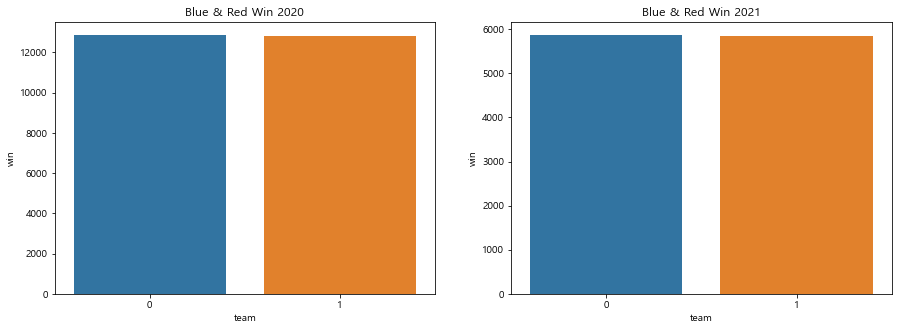

BlueTeamWin 2020: 12833 
 RedTeamWin 2020: 12872
--------------------------------------------
BlueTeamWin 2021: 5852 
 RedTeamWin 2021: 5871


In [14]:
#0:Red Win, 1:Blue Win
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,2,1)
ax1.set_title('Blue & Red Win 2020')

ax2=fig.add_subplot(1,2,2)
ax2.set_title('Blue & Red Win 2021')

sns.countplot('result',data=match_20,ax=ax1)
ax1.set_ylabel('win')
ax1.set_xlabel('team')

sns.countplot('result',data=match_21,ax=ax2)
ax2.set_ylabel('win')
ax2.set_xlabel('team')

plt.show()

print('BlueTeamWin 2020:',len(match_20[match_20['result']==1]),'\n','RedTeamWin 2020:',len(match_20[match_20['result']==0]))
print('--------------------------------------------')
print('BlueTeamWin 2021:',len(match_21[match_21['result']==1]),'\n','RedTeamWin 2021:',len(match_21[match_21['result']==0]))

## Most Picked Champion

In [15]:
champ_20=[]
for x in [2,12,22,32,42,52,62,72,82,92]:
    a=match_20.iloc[:,x].value_counts()
    champ_20.append(a)
champ_20=pd.DataFrame(champ_20).T
champ_20['played']=champ_20.iloc[:,0]+champ_20.iloc[:,1]+champ_20.iloc[:,2]+champ_20.iloc[:,3]+champ_20.iloc[:,4]+\
                    champ_20.iloc[:,5]+champ_20.iloc[:,6]+champ_20.iloc[:,7]+champ_20.iloc[:,8]+champ_20.iloc[:,9]
champ_20=pd.DataFrame(champ_20['played'])
champ_20_top30=champ_20.sort_values(by=['played'],ascending=False).head(30)

champ_21=[]
for x in [2,12,22,32,42,52,62,72,82,92]:
    a=match_21.iloc[:,x].value_counts()
    champ_21.append(a)
champ_21=pd.DataFrame(champ_21).T
champ_21['played']=champ_21.iloc[:,0]+champ_21.iloc[:,1]+champ_21.iloc[:,2]+champ_21.iloc[:,3]+champ_21.iloc[:,4]+\
                    champ_21.iloc[:,5]+champ_21.iloc[:,6]+champ_21.iloc[:,7]+champ_21.iloc[:,8]+champ_21.iloc[:,9]
champ_21=pd.DataFrame(champ_21['played'])
champ_21_top30=champ_21.sort_values(by=['played'],ascending=False).head(30)

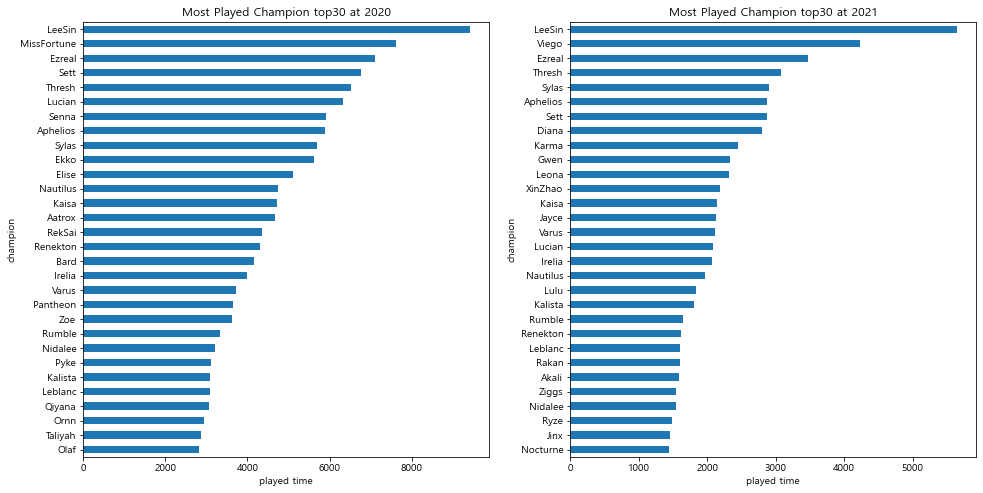

In [16]:
f,ax=plt.subplots(1,2,figsize=(16,8))
champ_20_top30['played'].plot.barh(ax=ax[0]).invert_yaxis()
ax[0].set_title("Most Played Champion top30 at 2020")
ax[0].set_ylabel('champion')
ax[0].set_xlabel('played time')

champ_21_top30['played'].plot.barh(ax=ax[1]).invert_yaxis()
ax[1].set_title("Most Played Champion top30 at 2021")
ax[1].set_ylabel('champion')
ax[1].set_xlabel('played time')

plt.show()

## KDA Perfect Champion

In [17]:
# 위의 데이터의 경우 KDA 퍼펙트에 대한 처리를 했기에 데이터를 새로 불러와서 작업

match_20_tmp=pd.read_csv('D:/Final_Project/data/match_20_final_data.csv',index_col=0)
match_21_tmp=pd.read_csv('D:/Final_Project/data/match_21_final_data.csv',index_col=0)

drop_list=list(match_20_tmp[match_20_tmp['blue_1_champ']==match_20_tmp['blue_2_champ']].index)
match_20_tmp.drop(drop_list,0,inplace=True)
drop_list=list(match_20_tmp[(match_20_tmp['blue_1_spell1'].isna())|(match_20_tmp['blue_1_spell2'].isna())].index)
match_20_tmp.drop(drop_list,0,inplace=True)
match_20_tmp.reset_index(drop=True,inplace=True)

match_20_tmp['blue_1_kda']=(match_20_tmp['blue_1_kill']+match_20_tmp['blue_1_assist'])/match_20_tmp['blue_1_death']
match_20_tmp['blue_2_kda']=(match_20_tmp['blue_2_kill']+match_20_tmp['blue_2_assist'])/match_20_tmp['blue_2_death']
match_20_tmp['blue_3_kda']=(match_20_tmp['blue_3_kill']+match_20_tmp['blue_3_assist'])/match_20_tmp['blue_3_death']
match_20_tmp['blue_4_kda']=(match_20_tmp['blue_4_kill']+match_20_tmp['blue_4_assist'])/match_20_tmp['blue_4_death']
match_20_tmp['blue_5_kda']=(match_20_tmp['blue_5_kill']+match_20_tmp['blue_5_assist'])/match_20_tmp['blue_5_death']

match_20_tmp['red_1_kda']=(match_20_tmp['red_1_kill']+match_20_tmp['red_1_assist'])/match_20_tmp['red_1_death']
match_20_tmp['red_2_kda']=(match_20_tmp['red_2_kill']+match_20_tmp['red_2_assist'])/match_20_tmp['red_2_death']
match_20_tmp['red_3_kda']=(match_20_tmp['red_3_kill']+match_20_tmp['red_3_assist'])/match_20_tmp['red_3_death']
match_20_tmp['red_4_kda']=(match_20_tmp['red_4_kill']+match_20_tmp['red_4_assist'])/match_20_tmp['red_4_death']
match_20_tmp['red_5_kda']=(match_20_tmp['red_5_kill']+match_20_tmp['red_5_assist'])/match_20_tmp['red_5_death']

match_20_tmp.replace(np.nan,0,inplace=True)

drop_list=list(match_21_tmp[match_21_tmp['blue_1_champ']==match_21_tmp['blue_2_champ']].index)
match_21_tmp.drop(drop_list,0,inplace=True)
drop_list=list(match_21_tmp[(match_21_tmp['blue_1_spell1'].isna())|(match_21_tmp['blue_1_spell2'].isna())].index)
match_21_tmp.drop(drop_list,0,inplace=True)
match_21_tmp.reset_index(drop=True,inplace=True)

match_21_tmp['blue_1_kda']=(match_21_tmp['blue_1_kill']+match_21_tmp['blue_1_assist'])/match_21_tmp['blue_1_death']
match_21_tmp['blue_2_kda']=(match_21_tmp['blue_2_kill']+match_21_tmp['blue_2_assist'])/match_21_tmp['blue_2_death']
match_21_tmp['blue_3_kda']=(match_21_tmp['blue_3_kill']+match_21_tmp['blue_3_assist'])/match_21_tmp['blue_3_death']
match_21_tmp['blue_4_kda']=(match_21_tmp['blue_4_kill']+match_21_tmp['blue_4_assist'])/match_21_tmp['blue_4_death']
match_21_tmp['blue_5_kda']=(match_21_tmp['blue_5_kill']+match_21_tmp['blue_5_assist'])/match_21_tmp['blue_5_death']

match_21_tmp['red_1_kda']=(match_21_tmp['red_1_kill']+match_21_tmp['red_1_assist'])/match_21_tmp['red_1_death']
match_21_tmp['red_2_kda']=(match_21_tmp['red_2_kill']+match_21_tmp['red_2_assist'])/match_21_tmp['red_2_death']
match_21_tmp['red_3_kda']=(match_21_tmp['red_3_kill']+match_21_tmp['red_3_assist'])/match_21_tmp['red_3_death']
match_21_tmp['red_4_kda']=(match_21_tmp['red_4_kill']+match_21_tmp['red_4_assist'])/match_21_tmp['red_4_death']
match_21_tmp['red_5_kda']=(match_21_tmp['red_5_kill']+match_21_tmp['red_5_assist'])/match_21_tmp['red_5_death']

match_21_tmp.replace(np.nan,0,inplace=True)

In [18]:
kda_per_champ1=match_20_tmp[match_20_tmp['blue_1_kda']==np.inf]['blue_1_champ']
kda_per_champ2=match_20_tmp[match_20_tmp['blue_2_kda']==np.inf]['blue_2_champ']
kda_per_champ3=match_20_tmp[match_20_tmp['blue_3_kda']==np.inf]['blue_3_champ']
kda_per_champ4=match_20_tmp[match_20_tmp['blue_4_kda']==np.inf]['blue_4_champ']
kda_per_champ5=match_20_tmp[match_20_tmp['blue_5_kda']==np.inf]['blue_5_champ']
kda_per_champ6=match_20_tmp[match_20_tmp['red_1_kda']==np.inf]['red_1_champ']
kda_per_champ7=match_20_tmp[match_20_tmp['red_2_kda']==np.inf]['red_2_champ']
kda_per_champ8=match_20_tmp[match_20_tmp['red_3_kda']==np.inf]['red_3_champ']
kda_per_champ9=match_20_tmp[match_20_tmp['red_4_kda']==np.inf]['red_4_champ']
kda_per_champ10=match_20_tmp[match_20_tmp['red_5_kda']==np.inf]['red_5_champ']

perfect_champ_20=pd.concat([kda_per_champ1,kda_per_champ2,kda_per_champ3,kda_per_champ4,kda_per_champ5,
                        kda_per_champ6,kda_per_champ7,kda_per_champ8,kda_per_champ9,kda_per_champ10])
perfect_champ_20=pd.DataFrame(perfect_champ_20)

kda_per_champ1=match_21_tmp[match_21_tmp['blue_1_kda']==np.inf]['blue_1_champ']
kda_per_champ2=match_21_tmp[match_21_tmp['blue_2_kda']==np.inf]['blue_2_champ']
kda_per_champ3=match_21_tmp[match_21_tmp['blue_3_kda']==np.inf]['blue_3_champ']
kda_per_champ4=match_21_tmp[match_21_tmp['blue_4_kda']==np.inf]['blue_4_champ']
kda_per_champ5=match_21_tmp[match_21_tmp['blue_5_kda']==np.inf]['blue_5_champ']
kda_per_champ6=match_21_tmp[match_21_tmp['red_1_kda']==np.inf]['red_1_champ']
kda_per_champ7=match_21_tmp[match_21_tmp['red_2_kda']==np.inf]['red_2_champ']
kda_per_champ8=match_21_tmp[match_21_tmp['red_3_kda']==np.inf]['red_3_champ']
kda_per_champ9=match_21_tmp[match_21_tmp['red_4_kda']==np.inf]['red_4_champ']
kda_per_champ10=match_21_tmp[match_21_tmp['red_5_kda']==np.inf]['red_5_champ']

perfect_champ_21=pd.concat([kda_per_champ1,kda_per_champ2,kda_per_champ3,kda_per_champ4,kda_per_champ5,
                        kda_per_champ6,kda_per_champ7,kda_per_champ8,kda_per_champ9,kda_per_champ10])
perfect_champ_21=pd.DataFrame(perfect_champ_21)

perfect_champ_20_top30=pd.DataFrame(perfect_champ_20.value_counts().sort_values(ascending=False).head(30))
perfect_champ_21_top30=pd.DataFrame(perfect_champ_21.value_counts().sort_values(ascending=False).head(30))

In [19]:
perfect_champ_20_top30.rename(columns={0:'time'},inplace=True)
perfect_champ_20_top30.reset_index(inplace=True)
perfect_champ_20_top30.rename(columns={0:''},inplace=True)
perfect_champ_20_top30.set_index('',inplace=True)
perfect_champ_21_top30.rename(columns={0:'time'},inplace=True)
perfect_champ_21_top30.reset_index(inplace=True)
perfect_champ_21_top30.rename(columns={0:''},inplace=True)
perfect_champ_21_top30.set_index('',inplace=True)

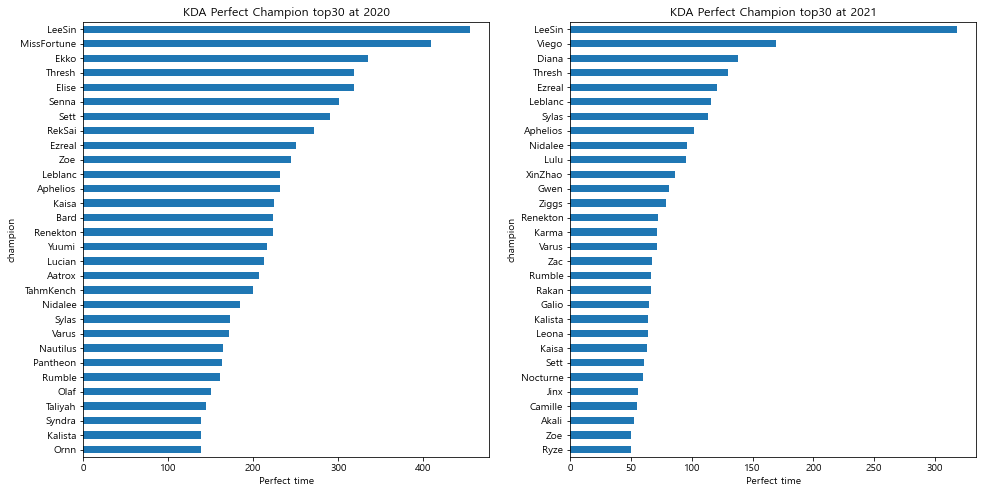

In [20]:
f,ax=plt.subplots(1,2,figsize=(16,8))
perfect_champ_20_top30['time'].plot.barh(ax=ax[0]).invert_yaxis()
ax[0].set_title("KDA Perfect Champion top30 at 2020")
ax[0].set_ylabel('champion')
ax[0].set_xlabel('Perfect time')

perfect_champ_21_top30['time'].plot.barh(ax=ax[1]).invert_yaxis()
ax[1].set_title("KDA Perfect Champion top30 at 2021")
ax[1].set_ylabel('champion')
ax[1].set_xlabel('Perfect time')

plt.show()

# Analyze about Specific Champions by Position  
1. Top 
* 볼리베어, 오른, 레넥톤, 다리우스, 이렐리아
2. Jungle  
* 리신 엘리스 니달리 카서스 그레이브즈
3. MID  
* 제드 갈리오 르블랑 야스오 사일러스
4. AD Carry
* 베인 이즈리얼 루시안 진 카이사
5. Support  
* 레오나 블츠 쓰레쉬 룰루 알리스타

### Function for Data extract

In [21]:
def champ_data_20(x):
    champ_20=match_20[(match_20['blue_1_champ']==x)|(match_20['blue_2_champ']==x)|\
        (match_20['blue_3_champ']==x)|(match_20['blue_4_champ']==x)|\
        (match_20['blue_5_champ']==x)|(match_20['red_1_champ']==x)|\
        (match_20['red_2_champ']==x)|(match_20['red_3_champ']==x)|\
        (match_20['red_4_champ']==x)|(match_20['red_5_champ']==x)]
    champ_20.reset_index(inplace=True)
    champ_20.drop('index',1,inplace=True)
    return champ_20

def champ_data_21(x):
    champ_21=match_21[(match_21['blue_1_champ']==x)|(match_21['blue_2_champ']==x)|\
        (match_21['blue_3_champ']==x)|(match_21['blue_4_champ']==x)|\
        (match_21['blue_5_champ']==x)|(match_21['red_1_champ']==x)|\
        (match_21['red_2_champ']==x)|(match_21['red_3_champ']==x)|\
        (match_21['red_4_champ']==x)|(match_21['red_5_champ']==x)]
    champ_21.reset_index(inplace=True)
    champ_21.drop('index',1,inplace=True)
    return champ_21

In [22]:
def champ_bluewin_20(x):
    champ_blue_20=match_20[(match_20['blue_1_champ']==x)|(match_20['blue_2_champ']==x)|\
        (match_20['blue_3_champ']==x)|(match_20['blue_4_champ']==x)|\
        (match_20['blue_5_champ']==x)]
    champ_bluewin_20=champ_blue_20[champ_blue_20['result']==1]
    return champ_bluewin_20

def champ_redwin_20(x):
    champ_red_20=match_20[(match_20['red_1_champ']==x)|(match_20['red_2_champ']==x)|\
        (match_20['red_3_champ']==x)|(match_20['red_4_champ']==x)|\
        (match_20['red_5_champ']==x)]
    champ_redwin_20=champ_red_20[champ_red_20['result']==0]
    return champ_redwin_20

def champ_bluewin_21(x):
    champ_blue_21=match_21[(match_21['blue_1_champ']==x)|(match_21['blue_2_champ']==x)|\
        (match_21['blue_3_champ']==x)|(match_21['blue_4_champ']==x)|\
        (match_21['blue_5_champ']==x)]
    champ_bluewin_21=champ_blue_21[champ_blue_21['result']==1]
    return champ_bluewin_21

def champ_redwin_21(x):
    champ_red_21=match_21[(match_21['red_1_champ']==x)|(match_21['red_2_champ']==x)|\
        (match_21['red_3_champ']==x)|(match_21['red_4_champ']==x)|\
        (match_21['red_5_champ']==x)]
    champ_redwin_21=champ_red_21[champ_red_21['result']==0]
    return champ_redwin_21

In [23]:
def kda_20(x):
    kda_b_1=match_20[match_20['blue_1_champ']==x]['blue_1_kda']
    kda_b_2=match_20[match_20['blue_2_champ']==x]['blue_2_kda']
    kda_b_3=match_20[match_20['blue_3_champ']==x]['blue_3_kda']
    kda_b_4=match_20[match_20['blue_4_champ']==x]['blue_4_kda']
    kda_b_5=match_20[match_20['blue_5_champ']==x]['blue_5_kda']

    kda_r_1=match_20[match_20['red_1_champ']==x]['red_1_kda']
    kda_r_2=match_20[match_20['red_2_champ']==x]['red_2_kda']
    kda_r_3=match_20[match_20['red_3_champ']==x]['red_3_kda']
    kda_r_4=match_20[match_20['red_4_champ']==x]['red_4_kda']
    kda_r_5=match_20[match_20['red_5_champ']==x]['red_5_kda']
    
    kda_20=pd.concat([kda_b_1,kda_b_2,kda_b_3,kda_b_4,kda_b_5,kda_r_1,kda_r_2,kda_r_3,kda_r_4,kda_r_5])
    return kda_20

def kda_21(x):
    kda_b_1=match_21[match_21['blue_1_champ']==x]['blue_1_kda']
    kda_b_2=match_21[match_21['blue_2_champ']==x]['blue_2_kda']
    kda_b_3=match_21[match_21['blue_3_champ']==x]['blue_3_kda']
    kda_b_4=match_21[match_21['blue_4_champ']==x]['blue_4_kda']
    kda_b_5=match_21[match_21['blue_5_champ']==x]['blue_5_kda']

    kda_r_1=match_21[match_21['red_1_champ']==x]['red_1_kda']
    kda_r_2=match_21[match_21['red_2_champ']==x]['red_2_kda']
    kda_r_3=match_21[match_21['red_3_champ']==x]['red_3_kda']
    kda_r_4=match_21[match_21['red_4_champ']==x]['red_4_kda']
    kda_r_5=match_21[match_21['red_5_champ']==x]['red_5_kda']
    
    kda_21=pd.concat([kda_b_1,kda_b_2,kda_b_3,kda_b_4,kda_b_5,kda_r_1,kda_r_2,kda_r_3,kda_r_4,kda_r_5])
    return kda_21

In [24]:
def champ_deal_20(x):
    deal_b_1=match_20[match_20['blue_1_champ']==x]['blue_1_totaldamage_dealt']
    deal_b_2=match_20[match_20['blue_2_champ']==x]['blue_2_totaldamage_dealt']
    deal_b_3=match_20[match_20['blue_3_champ']==x]['blue_3_totaldamage_dealt']
    deal_b_4=match_20[match_20['blue_4_champ']==x]['blue_4_totaldamage_dealt']
    deal_b_5=match_20[match_20['blue_5_champ']==x]['blue_5_totaldamage_dealt']

    deal_r_1=match_20[match_20['red_1_champ']==x]['red_1_totaldamage_dealt']
    deal_r_2=match_20[match_20['red_2_champ']==x]['red_2_totaldamage_dealt']
    deal_r_3=match_20[match_20['red_3_champ']==x]['red_3_totaldamage_dealt']
    deal_r_4=match_20[match_20['red_4_champ']==x]['red_4_totaldamage_dealt']
    deal_r_5=match_20[match_20['red_5_champ']==x]['red_5_totaldamage_dealt']
    
    deal_20=pd.concat([deal_b_1,deal_b_2,deal_b_3,deal_b_4,deal_b_5,deal_r_1,deal_r_2,deal_r_3,deal_r_4,deal_r_5])
    return deal_20

def champ_deal_21(x):
    deal_b_1=match_21[match_21['blue_1_champ']==x]['blue_1_totaldamage_dealt']
    deal_b_2=match_21[match_21['blue_2_champ']==x]['blue_2_totaldamage_dealt']
    deal_b_3=match_21[match_21['blue_3_champ']==x]['blue_3_totaldamage_dealt']
    deal_b_4=match_21[match_21['blue_4_champ']==x]['blue_4_totaldamage_dealt']
    deal_b_5=match_21[match_21['blue_5_champ']==x]['blue_5_totaldamage_dealt']

    deal_r_1=match_21[match_21['red_1_champ']==x]['red_1_totaldamage_dealt']
    deal_r_2=match_21[match_21['red_2_champ']==x]['red_2_totaldamage_dealt']
    deal_r_3=match_21[match_21['red_3_champ']==x]['red_3_totaldamage_dealt']
    deal_r_4=match_21[match_21['red_4_champ']==x]['red_4_totaldamage_dealt']
    deal_r_5=match_21[match_21['red_5_champ']==x]['red_5_totaldamage_dealt']
    
    deal_21=pd.concat([deal_b_1,deal_b_2,deal_b_3,deal_b_4,deal_b_5,deal_r_1,deal_r_2,deal_r_3,deal_r_4,deal_r_5])
    return deal_21

In [25]:
def champ_damage_20(x):
    damage_b_1=match_20[match_20['blue_1_champ']==x]['blue_1_totaldamage_taken']
    damage_b_2=match_20[match_20['blue_2_champ']==x]['blue_2_totaldamage_taken']
    damage_b_3=match_20[match_20['blue_3_champ']==x]['blue_3_totaldamage_taken']
    damage_b_4=match_20[match_20['blue_4_champ']==x]['blue_4_totaldamage_taken']
    damage_b_5=match_20[match_20['blue_5_champ']==x]['blue_5_totaldamage_taken']

    damage_r_1=match_20[match_20['red_1_champ']==x]['red_1_totaldamage_taken']
    damage_r_2=match_20[match_20['red_2_champ']==x]['red_2_totaldamage_taken']
    damage_r_3=match_20[match_20['red_3_champ']==x]['red_3_totaldamage_taken']
    damage_r_4=match_20[match_20['red_4_champ']==x]['red_4_totaldamage_taken']
    damage_r_5=match_20[match_20['red_5_champ']==x]['red_5_totaldamage_taken']
    
    damage_20=pd.concat([damage_b_1,damage_b_2,damage_b_3,damage_b_4,damage_b_5,damage_r_1,damage_r_2,damage_r_3,damage_r_4,damage_r_5])
    return damage_20

def champ_damage_21(x):
    damage_b_1=match_21[match_21['blue_1_champ']==x]['blue_1_totaldamage_taken']
    damage_b_2=match_21[match_21['blue_2_champ']==x]['blue_2_totaldamage_taken']
    damage_b_3=match_21[match_21['blue_3_champ']==x]['blue_3_totaldamage_taken']
    damage_b_4=match_21[match_21['blue_4_champ']==x]['blue_4_totaldamage_taken']
    damage_b_5=match_21[match_21['blue_5_champ']==x]['blue_5_totaldamage_taken']

    damage_r_1=match_21[match_21['red_1_champ']==x]['red_1_totaldamage_taken']
    damage_r_2=match_21[match_21['red_2_champ']==x]['red_2_totaldamage_taken']
    damage_r_3=match_21[match_21['red_3_champ']==x]['red_3_totaldamage_taken']
    damage_r_4=match_21[match_21['red_4_champ']==x]['red_4_totaldamage_taken']
    damage_r_5=match_21[match_21['red_5_champ']==x]['red_5_totaldamage_taken']
    
    damage_21=pd.concat([damage_b_1,damage_b_2,damage_b_3,damage_b_4,damage_b_5,damage_r_1,damage_r_2,damage_r_3,damage_r_4,damage_r_5])
    return damage_21

In [26]:
def cs_20(x):
    cs_b_1=match_20[match_20['blue_1_champ']==x]['blue_1_cs']
    cs_b_2=match_20[match_20['blue_2_champ']==x]['blue_2_cs']
    cs_b_3=match_20[match_20['blue_3_champ']==x]['blue_3_cs']
    cs_b_4=match_20[match_20['blue_4_champ']==x]['blue_4_cs']
    cs_b_5=match_20[match_20['blue_5_champ']==x]['blue_5_cs']

    cs_r_1=match_20[match_20['red_1_champ']==x]['red_1_cs']
    cs_r_2=match_20[match_20['red_2_champ']==x]['red_2_cs']
    cs_r_3=match_20[match_20['red_3_champ']==x]['red_3_cs']
    cs_r_4=match_20[match_20['red_4_champ']==x]['red_4_cs']
    cs_r_5=match_20[match_20['red_5_champ']==x]['red_5_cs']
    
    cs_20=pd.concat([cs_b_1,cs_b_2,cs_b_3,cs_b_4,cs_b_5,cs_r_1,cs_r_2,cs_r_3,cs_r_4,cs_r_5])
    return cs_20

def cs_21(x):
    cs_b_1=match_21[match_21['blue_1_champ']==x]['blue_1_cs']
    cs_b_2=match_21[match_21['blue_2_champ']==x]['blue_2_cs']
    cs_b_3=match_21[match_21['blue_3_champ']==x]['blue_3_cs']
    cs_b_4=match_21[match_21['blue_4_champ']==x]['blue_4_cs']
    cs_b_5=match_21[match_21['blue_5_champ']==x]['blue_5_cs']

    cs_r_1=match_21[match_21['red_1_champ']==x]['red_1_cs']
    cs_r_2=match_21[match_21['red_2_champ']==x]['red_2_cs']
    cs_r_3=match_21[match_21['red_3_champ']==x]['red_3_cs']
    cs_r_4=match_21[match_21['red_4_champ']==x]['red_4_cs']
    cs_r_5=match_21[match_21['red_5_champ']==x]['red_5_cs']
    
    cs_21=pd.concat([cs_b_1,cs_b_2,cs_b_3,cs_b_4,cs_b_5,cs_r_1,cs_r_2,cs_r_3,cs_r_4,cs_r_5])
    return cs_21

In [27]:
def visionscore_20(x):
    visionscore_b_1=match_20[match_20['blue_1_champ']==x]['blue_1_visionscore']
    visionscore_b_2=match_20[match_20['blue_2_champ']==x]['blue_2_visionscore']
    visionscore_b_3=match_20[match_20['blue_3_champ']==x]['blue_3_visionscore']
    visionscore_b_4=match_20[match_20['blue_4_champ']==x]['blue_4_visionscore']
    visionscore_b_5=match_20[match_20['blue_5_champ']==x]['blue_5_visionscore']

    visionscore_r_1=match_20[match_20['red_1_champ']==x]['red_1_visionscore']
    visionscore_r_2=match_20[match_20['red_2_champ']==x]['red_2_visionscore']
    visionscore_r_3=match_20[match_20['red_3_champ']==x]['red_3_visionscore']
    visionscore_r_4=match_20[match_20['red_4_champ']==x]['red_4_visionscore']
    visionscore_r_5=match_20[match_20['red_5_champ']==x]['red_5_visionscore']
    
    visionscore_20=pd.concat([visionscore_b_1,visionscore_b_2,visionscore_b_3,visionscore_b_4,visionscore_b_5,visionscore_r_1,visionscore_r_2,visionscore_r_3,visionscore_r_4,visionscore_r_5])
    return visionscore_20

def visionscore_21(x):
    visionscore_b_1=match_21[match_21['blue_1_champ']==x]['blue_1_visionscore']
    visionscore_b_2=match_21[match_21['blue_2_champ']==x]['blue_2_visionscore']
    visionscore_b_3=match_21[match_21['blue_3_champ']==x]['blue_3_visionscore']
    visionscore_b_4=match_21[match_21['blue_4_champ']==x]['blue_4_visionscore']
    visionscore_b_5=match_21[match_21['blue_5_champ']==x]['blue_5_visionscore']

    visionscore_r_1=match_21[match_21['red_1_champ']==x]['red_1_visionscore']
    visionscore_r_2=match_21[match_21['red_2_champ']==x]['red_2_visionscore']
    visionscore_r_3=match_21[match_21['red_3_champ']==x]['red_3_visionscore']
    visionscore_r_4=match_21[match_21['red_4_champ']==x]['red_4_visionscore']
    visionscore_r_5=match_21[match_21['red_5_champ']==x]['red_5_visionscore']
    
    visionscore_21=pd.concat([visionscore_b_1,visionscore_b_2,visionscore_b_3,visionscore_b_4,visionscore_b_5,visionscore_r_1,visionscore_r_2,visionscore_r_3,visionscore_r_4,visionscore_r_5])
    return visionscore_21

In [28]:
def visionscore_b_20(x):
    visionscore_b_1=match_20[match_20['blue_1_champ']==x]['blue_1_visionscore']
    visionscore_b_2=match_20[match_20['blue_2_champ']==x]['blue_2_visionscore']
    visionscore_b_3=match_20[match_20['blue_3_champ']==x]['blue_3_visionscore']
    visionscore_b_4=match_20[match_20['blue_4_champ']==x]['blue_4_visionscore']
    visionscore_b_5=match_20[match_20['blue_5_champ']==x]['blue_5_visionscore']
    visionscore_b_20=pd.concat([visionscore_b_1,visionscore_b_2,visionscore_b_3,visionscore_b_4,visionscore_b_5])
    return visionscore_b_20

def visionscore_r_20(x):
    visionscore_r_1=match_20[match_20['red_1_champ']==x]['red_1_visionscore']
    visionscore_r_2=match_20[match_20['red_2_champ']==x]['red_2_visionscore']
    visionscore_r_3=match_20[match_20['red_3_champ']==x]['red_3_visionscore']
    visionscore_r_4=match_20[match_20['red_4_champ']==x]['red_4_visionscore']
    visionscore_r_5=match_20[match_20['red_5_champ']==x]['red_5_visionscore']
    
    visionscore_r_20=pd.concat([visionscore_r_1,visionscore_r_2,visionscore_r_3,visionscore_r_4,visionscore_r_5])
    return visionscore_r_20

def visionscore_b_21(x):
    visionscore_b_1=match_21[match_21['blue_1_champ']==x]['blue_1_visionscore']
    visionscore_b_2=match_21[match_21['blue_2_champ']==x]['blue_2_visionscore']
    visionscore_b_3=match_21[match_21['blue_3_champ']==x]['blue_3_visionscore']
    visionscore_b_4=match_21[match_21['blue_4_champ']==x]['blue_4_visionscore']
    visionscore_b_5=match_21[match_21['blue_5_champ']==x]['blue_5_visionscore']
    visionscore_b_21=pd.concat([visionscore_b_1,visionscore_b_2,visionscore_b_3,visionscore_b_4,visionscore_b_5])
    return visionscore_b_21

def visionscore_r_21(x):
    visionscore_r_1=match_21[match_21['red_1_champ']==x]['red_1_visionscore']
    visionscore_r_2=match_21[match_21['red_2_champ']==x]['red_2_visionscore']
    visionscore_r_3=match_21[match_21['red_3_champ']==x]['red_3_visionscore']
    visionscore_r_4=match_21[match_21['red_4_champ']==x]['red_4_visionscore']
    visionscore_r_5=match_21[match_21['red_5_champ']==x]['red_5_visionscore']
    
    visionscore_r_21=pd.concat([visionscore_r_1,visionscore_r_2,visionscore_r_3,visionscore_r_4,visionscore_r_5])
    return visionscore_r_21

In [29]:
def win_vision_per100_20(x):
    global tmp_1,tmp_2
    c=pd.DataFrame(columns=['winrate','visionscore'])
    champ_blue_20=match_20[(match_20['blue_1_champ']==x)|(match_20['blue_2_champ']==x)|\
        (match_20['blue_3_champ']==x)|(match_20['blue_4_champ']==x)|\
        (match_20['blue_5_champ']==x)]
    champ_vision_b_20=visionscore_b_20(x)

    for i in range(len(champ_blue_20)):
        if i % 100 ==0:
            a=round(champ_blue_20.iloc[i-100:i,1][champ_blue_20['result']==1].count()/100,2)
            v=round(champ_vision_b_20.iloc[i-100:i].mean(),2)
            c=c.append(pd.DataFrame({'winrate':a,'visionscore':v},index=[i]))
        elif i == len(champ_blue_20)-1:
            a_1=round(champ_blue_20.iloc[(len(champ_blue_20)-(len(champ_blue_20)-1))%100:,1][champ_blue_20['result']==1].count()/(len(champ_blue_20)-1)%100,2)
            v_1=round(champ_vision_b_20.iloc[(len(champ_blue_20)-1)%100-1:i+1].mean(),2)
            tmp_1=pd.DataFrame({'winrate':a_1,'visionscore':v_1},index=[i])
    win_vision_b_per100=pd.concat([c,tmp_1],ignore_index=True)
    
    c1=pd.DataFrame(columns=['winrate','visionscore'])
    champ_red_20=match_20[(match_20['red_1_champ']==x)|(match_20['red_2_champ']==x)|\
        (match_20['red_3_champ']==x)|(match_20['red_4_champ']==x)|\
        (match_20['red_5_champ']==x)]
    champ_vision_b_20=visionscore_b_20(x)

    for i in range(len(champ_red_20)):
        if i % 100 ==0:
            a1=round(champ_red_20.iloc[i-100:i,1][champ_red_20['result']==1].count()/100,2)
            v1=round(champ_vision_b_20.iloc[i-100:i].mean(),2)
            c1=c1.append(pd.DataFrame({'winrate':a1,'visionscore':v1},index=[i]))
        elif i == len(champ_red_20)-1:
            a_2=round(champ_red_20.iloc[(len(champ_red_20)-(len(champ_red_20)-1))%100:,1][champ_red_20['result']==1].count()/(len(champ_red_20)-1)%100,2)
            v_2=round(champ_vision_b_20.iloc[(len(champ_red_20)-1)%100-1:i+1].mean(),2)
            tmp_2=pd.DataFrame({'winrate':a_2,'visionscore':v_2},index=[i])
    win_vision_r_per100=pd.concat([c1,tmp_2],ignore_index=True)
    
    win_vision_per100_20=pd.concat([win_vision_b_per100,win_vision_r_per100],ignore_index=True)
    win_vision_per100_20.dropna(inplace=True)
    win_vision_per100_20.reset_index(inplace=True,drop=True)
    return win_vision_per100_20

def win_vision_per100_21(x):
    global tmp_1,tmp_2
    c=pd.DataFrame(columns=['winrate','visionscore'])
    champ_blue_21=match_21[(match_21['blue_1_champ']==x)|(match_21['blue_2_champ']==x)|\
        (match_21['blue_3_champ']==x)|(match_21['blue_4_champ']==x)|\
        (match_21['blue_5_champ']==x)]
    champ_vision_b_21=visionscore_b_21(x)

    for i in range(len(champ_blue_21)):
        if i % 100 ==0:
            a=round(champ_blue_21.iloc[i-100:i,1][champ_blue_21['result']==1].count()/100,2)
            v=round(champ_vision_b_21.iloc[i-100:i].mean(),2)
            c=c.append(pd.DataFrame({'winrate':a,'visionscore':v},index=[i]))
        elif i == len(champ_blue_21)-1:
            a_1=round(champ_blue_21.iloc[(len(champ_blue_21)-(len(champ_blue_21)-1))%100:,1][champ_blue_21['result']==1].count()/(len(champ_blue_21)-1)%100,2)
            v_1=round(champ_vision_b_21.iloc[(len(champ_blue_21)-1)%100-1:i+1].mean(),2)
            tmp_1=pd.DataFrame({'winrate':a_1,'visionscore':v_1},index=[i])
    win_vision_b_per100=pd.concat([c,tmp_1],ignore_index=True)
    
    c1=pd.DataFrame(columns=['winrate','visionscore'])
    champ_red_21=match_21[(match_21['red_1_champ']==x)|(match_21['red_2_champ']==x)|\
        (match_21['red_3_champ']==x)|(match_21['red_4_champ']==x)|\
        (match_21['red_5_champ']==x)]
    champ_vision_b_21=visionscore_b_21(x)

    for i in range(len(champ_red_21)):
        if i % 100 ==0:
            a1=round(champ_red_21.iloc[i-100:i,1][champ_red_21['result']==1].count()/100,2)
            v1=round(champ_vision_b_21.iloc[i-100:i].mean(),2)
            c1=c1.append(pd.DataFrame({'winrate':a1,'visionscore':v1},index=[i]))
        elif i == len(champ_red_21)-1:
            a_2=round(champ_red_21.iloc[(len(champ_red_21)-(len(champ_red_21)-1))%100:,1][champ_red_21['result']==1].count()/(len(champ_red_21)-1)%100,2)
            v_2=round(champ_vision_b_21.iloc[(len(champ_red_21)-1)%100-1:i+1].mean(),2)
            tmp_2=pd.DataFrame({'winrate':a_2,'visionscore':v_2},index=[i])
    win_vision_r_per100=pd.concat([c1,tmp_2],ignore_index=True)
    
    win_vision_per100_21=pd.concat([win_vision_b_per100,win_vision_r_per100],ignore_index=True)
    win_vision_per100_21.dropna(inplace=True)
    win_vision_per100_21.reset_index(inplace=True,drop=True)
    return win_vision_per100_21

In [30]:
def win_per100_2020_b(x):
    tmp_b=pd.DataFrame(columns=['winrate'])
    champ_blue_20=match_20[(match_20['blue_1_champ']==x)|(match_20['blue_2_champ']==x)|\
        (match_20['blue_3_champ']==x)|(match_20['blue_4_champ']==x)|\
        (match_20['blue_5_champ']==x)]
    
    for i in range(len(champ_blue_20)):
        if i%100==0:
            winrate=round(champ_blue_20.iloc[i-100:i,1][champ_blue_20['result']==1].count()/100,2)
            tmp_b=tmp_b.append(pd.DataFrame({'winrate':winrate},index=[i]),ignore_index=True)
        elif i == len(champ_blue_20)-1:
            winrate_rest=round(champ_blue_20.iloc[(len(champ_blue_20)-(len(champ_blue_20)-1))%100:,1][champ_blue_20['result']==1].count()/(len(champ_blue_20)-1)%100,2)
            tmp_b=tmp_b.append(pd.DataFrame({'winrate':winrate_rest},index=[i]),ignore_index=True)
    
    idx_b=[]
    for i in range(len(champ_blue_20)):
        if i%100==0:
            tmp_b_idx=list(champ_blue_20.iloc[i-100:i,1][champ_blue_20['result']==1].index)
            idx_b.append(tmp_b_idx)
        elif i == len(champ_blue_20)-1:
            tmp_b_idx_1=list(champ_blue_20[champ_blue_20['result']==1].index)[len(champ_blue_20[champ_blue_20['result']==1])-1]
            idx_b.append(tmp_b_idx_1)
    idx_b_list=[]
    for x in range(len(idx_b)):
        idx_b_tmp=round(np.mean(idx_b[x]),0)
        idx_b_list.append(idx_b_tmp)    
    
    tmp_b['']=idx_b_list
    tmp_b.dropna(inplace=True)
    tmp_b.set_index('',inplace=True)
    return tmp_b

def win_per100_2021_b(x):
    tmp_b=pd.DataFrame(columns=['winrate'])
    champ_blue_21=match_21[(match_21['blue_1_champ']==x)|(match_21['blue_2_champ']==x)|\
        (match_21['blue_3_champ']==x)|(match_21['blue_4_champ']==x)|\
        (match_21['blue_5_champ']==x)]
    
    for i in range(len(champ_blue_21)):
        if i%100==0:
            winrate=round(champ_blue_21.iloc[i-100:i,1][champ_blue_21['result']==1].count()/100,2)
            tmp_b=tmp_b.append(pd.DataFrame({'winrate':winrate},index=[i]),ignore_index=True)
        elif i == len(champ_blue_21)-1:
            winrate_rest=round(champ_blue_21.iloc[(len(champ_blue_21)-(len(champ_blue_21)-1))%100:,1][champ_blue_21['result']==1].count()/(len(champ_blue_21)-1)%100,2)
            tmp_b=tmp_b.append(pd.DataFrame({'winrate':winrate_rest},index=[i]),ignore_index=True)
    
    idx_b=[]
    for i in range(len(champ_blue_21)):
        if i%100==0:
            tmp_b_idx=list(champ_blue_21.iloc[i-100:i,1][champ_blue_21['result']==1].index)
            idx_b.append(tmp_b_idx)
        elif i == len(champ_blue_21)-1:
            tmp_b_idx_1=list(champ_blue_21[champ_blue_21['result']==1].index)[len(champ_blue_21[champ_blue_21['result']==1])-1]
            idx_b.append(tmp_b_idx_1)
    idx_b_list=[]
    for x in range(len(idx_b)):
        idx_b_tmp=round(np.mean(idx_b[x]),0)
        idx_b_list.append(idx_b_tmp)    
    
    tmp_b['']=idx_b_list
    tmp_b.dropna(inplace=True)
    tmp_b.set_index('',inplace=True)
    return tmp_b

In [31]:
def win_per100_2020_r(x):
    tmp_r=pd.DataFrame(columns=['winrate'])
    champ_red_20=match_20[(match_20['red_1_champ']==x)|(match_20['red_2_champ']==x)|\
        (match_20['red_3_champ']==x)|(match_20['red_4_champ']==x)|\
        (match_20['red_5_champ']==x)]
    
    for i in range(len(champ_red_20)):
        if i%100==0:
            winrate=round(champ_red_20.iloc[i-100:i,1][champ_red_20['result']==1].count()/100,2)
            tmp_r=tmp_r.append(pd.DataFrame({'winrate':winrate},index=[i]),ignore_index=True)
        elif i == len(champ_red_20)-1:
            winrate_rest=round(champ_red_20.iloc[(len(champ_red_20)-(len(champ_red_20)-1))%100:,1][champ_red_20['result']==1].count()/(len(champ_red_20)-1)%100,2)
            tmp_r=tmp_r.append(pd.DataFrame({'winrate':winrate_rest},index=[i]),ignore_index=True)
            
    idx_r=[]
    for i in range(len(champ_red_20)):
        if i%100==0:
            tmp_r_idx=list(champ_red_20.iloc[i-100:i,1][champ_red_20['result']==1].index)
            idx_r.append(tmp_r_idx)
        elif i == len(champ_red_20)-1:
            tmp_r_idx_1=list(champ_red_20[champ_red_20['result']==1].index)[len(champ_red_20[champ_red_20['result']==1])-1]
            idx_r.append(tmp_r_idx_1)

    idx_r_list=[]
    for x in range(len(idx_r)):
        idx_r_tmp=round(np.mean(idx_r[x]),0)
        idx_r_list.append(idx_r_tmp)
        
    tmp_r['']=idx_r_list
    tmp_r.dropna(inplace=True)
    tmp_r.set_index('',inplace=True)
    return tmp_r

def win_per100_2021_r(x):
    tmp_r=pd.DataFrame(columns=['winrate'])
    champ_red_21=match_21[(match_21['red_1_champ']==x)|(match_21['red_2_champ']==x)|\
        (match_21['red_3_champ']==x)|(match_21['red_4_champ']==x)|\
        (match_21['red_5_champ']==x)]
    
    for i in range(len(champ_red_21)):
        if i%100==0:
            winrate=round(champ_red_21.iloc[i-100:i,1][champ_red_21['result']==1].count()/100,2)
            tmp_r=tmp_r.append(pd.DataFrame({'winrate':winrate},index=[i]),ignore_index=True)
        elif i == len(champ_red_21)-1:
            winrate_rest=round(champ_red_21.iloc[(len(champ_red_21)-(len(champ_red_21)-1))%100:,1][champ_red_21['result']==1].count()/(len(champ_red_21)-1)%100,2)
            tmp_r=tmp_r.append(pd.DataFrame({'winrate':winrate_rest},index=[i]),ignore_index=True)
            
    idx_r=[]
    for i in range(len(champ_red_21)):
        if i%100==0:
            tmp_r_idx=list(champ_red_21.iloc[i-100:i,1][champ_red_21['result']==1].index)
            idx_r.append(tmp_r_idx)
        elif i == len(champ_red_21)-1:
            tmp_r_idx_1=list(champ_red_21[champ_red_21['result']==1].index)[len(champ_red_21[champ_red_21['result']==1])-1]
            idx_r.append(tmp_r_idx_1)

    idx_r_list=[]
    for x in range(len(idx_r)):
        idx_r_tmp=round(np.mean(idx_r[x]),0)
        idx_r_list.append(idx_r_tmp)
        
    tmp_r['']=idx_r_list
    tmp_r.dropna(inplace=True)
    tmp_r.set_index('',inplace=True)
    return tmp_r

In [32]:
def win_per100_2020(x):
    win_per100_2020=pd.concat([win_per100_2020_b(x),win_per100_2020_r(x)]).sort_index()
    return win_per100_2020

def win_per100_2021(x):
    win_per100_2021=pd.concat([win_per100_2021_b(x),win_per100_2021_r(x)]).sort_index()
    return win_per100_2021

## Top

In [33]:
Bear_20=champ_data_20('Volibear')
Ornn_20=champ_data_20('Ornn')
Renek_20=champ_data_20('Renekton')
Darius_20=champ_data_20('Darius')
Irel_20=champ_data_20('Irelia')

Bear_21=champ_data_21('Volibear')
Ornn_21=champ_data_21('Ornn')
Renek_21=champ_data_21('Renekton')
Darius_21=champ_data_21('Darius')
Irel_21=champ_data_21('Irelia')

### Pick Rate

In [34]:
pick_20=pd.DataFrame({
    "Volibear's Picked Game":len(Bear_20),
    "Ornn's Picked Game":len(Ornn_20),
    "Renekton's Picked Game": len(Renek_20),
    "Darius's Picked Game": len(Darius_20),
    "Irelia's Picked Game": len(Irel_20),
    "Other Champion's Picked Game":(len(match_20)-len(Bear_20)-len(Ornn_20)-len(Renek_20)-len(Darius_20)-len(Irel_20))
    },index=[0]).T

pick_21=pd.DataFrame({
    "Volibear's Picked Game":len(Bear_21),
    "Ornn's Picked Game":len(Ornn_21),
    "Renekton's Picked Game": len(Renek_21),
    "Darius's Picked Game": len(Darius_21),
    "Irelia's Picked Game": len(Irel_21),
    "Other Champion's Picked Game":(len(match_21)-len(Bear_21)-len(Ornn_21)-len(Renek_21)-len(Darius_21)-len(Irel_21))
    },index=[0]).T

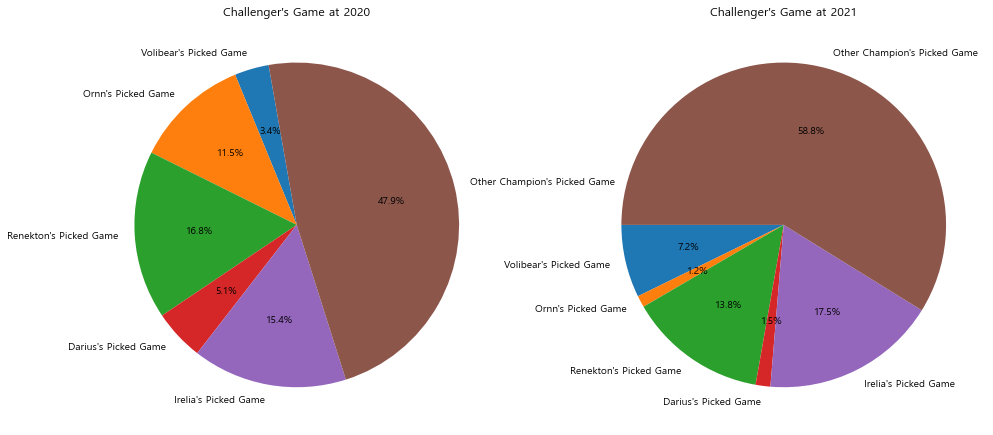

In [35]:
f,ax=plt.subplots(1,2,figsize=(16,8))
pick_20[0].plot.pie(ax=ax[0],autopct='%.1f%%', startangle=100)
ax[0].set_title("Challenger's Game at 2020")
ax[0].set_ylabel('')

pick_21[0].plot.pie(ax=ax[1],autopct='%.1f%%', startangle=180)
ax[1].set_title("Challenger's Game at 2021")
ax[1].set_ylabel('')

plt.show()

### Win Rate

In [36]:
Bear_20_blue_win=champ_bluewin_20('Volibear')
Ornn_20_blue_win=champ_bluewin_20('Ornn')
Renek_20_blue_win=champ_bluewin_20('Renekton')
Darius_20_blue_win=champ_bluewin_20('Darius')
Irel_20_blue_win=champ_bluewin_20('Irelia')

Bear_21_blue_win=champ_bluewin_21('Volibear')
Ornn_21_blue_win=champ_bluewin_21('Ornn')
Renek_21_blue_win=champ_bluewin_21('Renekton')
Darius_21_blue_win=champ_bluewin_21('Darius')
Irel_21_blue_win=champ_bluewin_21('Irelia')

In [37]:
Bear_20_red_win=champ_redwin_20('Volibear')
Ornn_20_red_win=champ_redwin_20('Ornn')
Renek_20_red_win=champ_redwin_20('Renekton')
Darius_20_red_win=champ_redwin_20('Darius')
Irel_20_red_win=champ_redwin_20('Irelia')

Bear_21_red_win=champ_redwin_21('Volibear')
Ornn_21_red_win=champ_redwin_21('Ornn')
Renek_21_red_win=champ_redwin_21('Renekton')
Darius_21_red_win=champ_redwin_21('Darius')
Irel_21_red_win=champ_redwin_21('Irelia')

In [38]:
Top_winrate=pd.DataFrame({
    '2020':[round(((len(Bear_20_blue_win)+len(Bear_20_red_win))/len(Bear_20))*100,2),
           round(((len(Ornn_20_blue_win)+len(Ornn_20_red_win))/len(Ornn_20))*100,2),
           round(((len(Renek_20_blue_win)+len(Renek_20_red_win))/len(Renek_20))*100,2),
           round(((len(Darius_20_blue_win)+len(Darius_20_red_win))/len(Darius_20))*100,2),
           round(((len(Irel_20_blue_win)+len(Irel_20_red_win))/len(Irel_20))*100,2)],
    '2021':[round(((len(Bear_21_blue_win)+len(Bear_21_red_win))/len(Bear_21))*100,2),
           round(((len(Ornn_21_blue_win)+len(Ornn_21_red_win))/len(Ornn_21))*100,2),
           round(((len(Renek_21_blue_win)+len(Renek_21_red_win))/len(Renek_21))*100,2),
           round(((len(Darius_21_blue_win)+len(Darius_21_red_win))/len(Darius_21))*100,2),
           round(((len(Irel_21_blue_win)+len(Irel_21_red_win))/len(Irel_21))*100,2)]
},index=['Volibear','Ornn','Renekton','Darius','Irelia'])

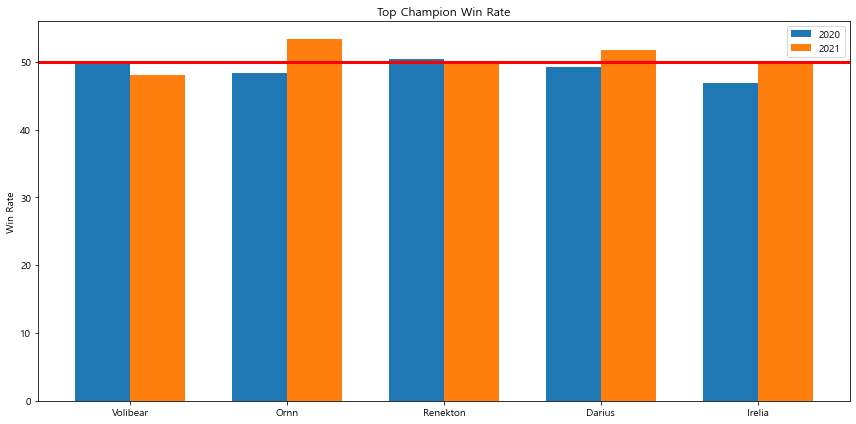

,2020,2021
Volibear,50.17,48.06
Ornn,48.37,53.28
Renekton,50.35,50.03
Darius,49.16,51.74
Irelia,46.80,49.93


In [39]:
label=list(Top_winrate.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Top_winrate['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Top_winrate['2021'],width,label='2021')
ax.set_ylabel('Win Rate')
ax.set_title('Top Champion Win Rate')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=50, color='r', linewidth=3)

plt.show()
Top_winrate

### KDA

In [40]:
Bear_kda_20=kda_20('Volibear')
Ornn_kda_20=kda_20('Ornn')
Renek_kda_20=kda_20('Renekton')
Darius_kda_20=kda_20('Darius')
Irel_kda_20=kda_20('Irelia')

Bear_kda_21=kda_21('Volibear')
Ornn_kda_21=kda_21('Ornn')
Renek_kda_21=kda_21('Renekton')
Darius_kda_21=kda_21('Darius')
Irel_kda_21=kda_21('Irelia')

In [41]:
Top_kda=pd.DataFrame({
    '2020':[round(Bear_kda_20.mean(),2),
           round(Ornn_kda_20.mean(),2),
           round(Renek_kda_20.mean(),2),
           round(Darius_kda_20.mean(),2),
           round(Irel_kda_20.mean(),2)],
    '2021':[round(Bear_kda_21.mean(),2),
           round(Ornn_kda_21.mean(),2),
           round(Renek_kda_21.mean(),2),
           round(Darius_kda_21.mean(),2),
           round(Irel_kda_21.mean(),2)]
},index=['Volibear','Ornn','Renekton','Darius','Irelia'])

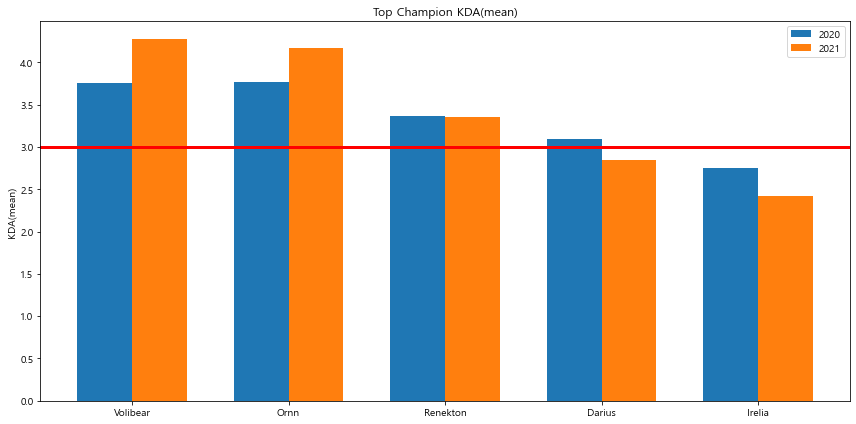

,2020,2021
Volibear,3.76,4.27
Ornn,3.77,4.17
Renekton,3.36,3.35
Darius,3.09,2.85
Irelia,2.75,2.42


In [42]:
label=list(Top_kda.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Top_kda['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Top_kda['2021'],width,label='2021')
ax.set_ylabel('KDA(mean)')
ax.set_title('Top Champion KDA(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=3, color='r', linewidth=3)

plt.show()
Top_kda

### Damage Dealt

In [43]:
Bear_deal_20=champ_deal_20('Volibear')
Ornn_deal_20=champ_deal_20('Ornn')
Renek_deal_20=champ_deal_20('Renekton')
Darius_deal_20=champ_deal_20('Darius')
Irel_deal_20=champ_deal_20('Irelia')

Bear_deal_21=champ_deal_21('Volibear')
Ornn_deal_21=champ_deal_21('Ornn')
Renek_deal_21=champ_deal_21('Renekton')
Darius_deal_21=champ_deal_21('Darius')
Irel_deal_21=champ_deal_21('Irelia')

In [44]:
Top_deal=pd.DataFrame({
    '2020':[round(Bear_deal_20.mean(),2),
           round(Ornn_deal_20.mean(),2),
           round(Renek_deal_20.mean(),2),
           round(Darius_deal_20.mean(),2),
           round(Irel_deal_20.mean(),2)],
    '2021':[round(Bear_deal_21.mean(),2),
           round(Ornn_deal_21.mean(),2),
           round(Renek_deal_21.mean(),2),
           round(Darius_deal_21.mean(),2),
           round(Irel_deal_21.mean(),2)]
},index=['Volibear','Ornn','Renekton','Darius','Irelia'])

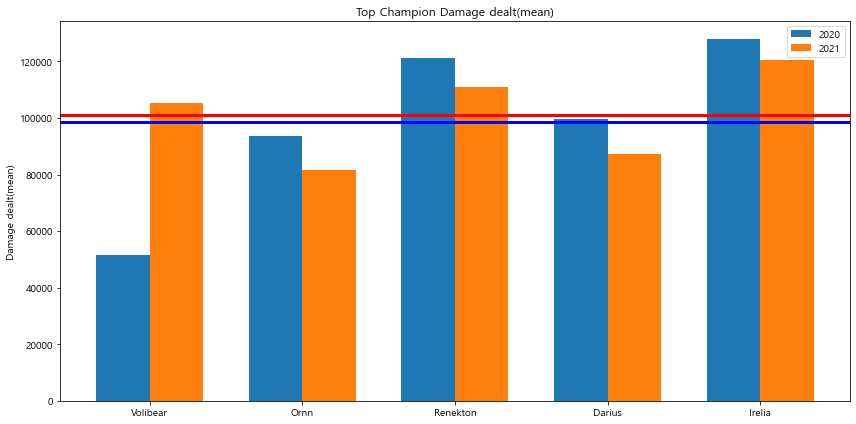

,2020,2021
Volibear,51681.46,105380.33
Ornn,93643.56,81616.53
Renekton,121144.72,111012.50
Darius,99454.05,87079.12
Irelia,127737.63,120621.56


In [45]:
label=list(Top_deal.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Top_deal['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Top_deal['2021'],width,label='2021')
ax.set_ylabel('Damage dealt(mean)')
ax.set_title('Top Champion Damage dealt(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=Top_deal['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=Top_deal['2021'].mean(), color='r', linewidth=3)

plt.show()
Top_deal

### Damage Taken

In [46]:
Bear_damage_20=champ_damage_20('Volibear')
Ornn_damage_20=champ_damage_20('Ornn')
Renek_damage_20=champ_damage_20('Renekton')
Darius_damage_20=champ_damage_20('Darius')
Irel_damage_20=champ_damage_20('Irelia')

Bear_damage_21=champ_damage_21('Volibear')
Ornn_damage_21=champ_damage_21('Ornn')
Renek_damage_21=champ_damage_21('Renekton')
Darius_damage_21=champ_damage_21('Darius')
Irel_damage_21=champ_damage_21('Irelia')

In [47]:
Top_damage=pd.DataFrame({
    '2020':[round(Bear_damage_20.mean(),2),
           round(Ornn_damage_20.mean(),2),
           round(Renek_damage_20.mean(),2),
           round(Darius_damage_20.mean(),2),
           round(Irel_damage_20.mean(),2)],
    '2021':[round(Bear_damage_21.mean(),2),
           round(Ornn_damage_21.mean(),2),
           round(Renek_damage_21.mean(),2),
           round(Darius_damage_21.mean(),2),
           round(Irel_damage_21.mean(),2)]
    },index=['Volibear','Ornn','Renekton','Darius','Irelia'])

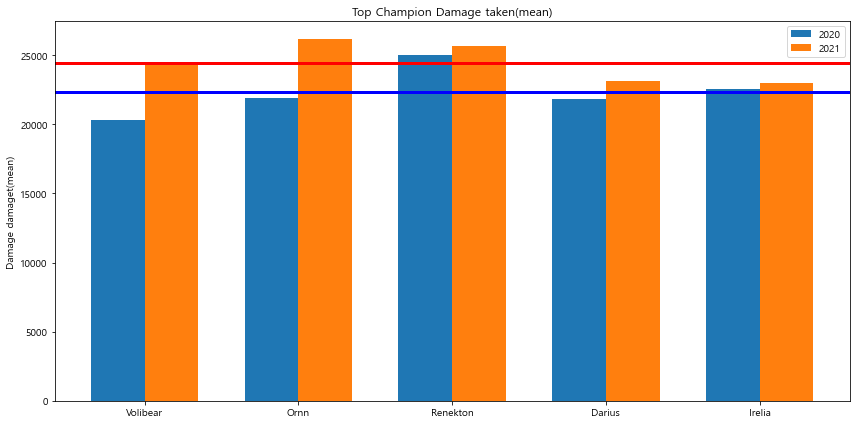

,2020,2021
Volibear,20293.40,24303.13
Ornn,21878.04,26144.39
Renekton,25019.69,25658.42
Darius,21851.97,23169.77
Irelia,22559.34,22995.28


In [48]:
label=list(Top_damage.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Top_damage['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Top_damage['2021'],width,label='2021')
ax.set_ylabel('Damage damaget(mean)')
ax.set_title('Top Champion Damage taken(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=Top_damage['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=Top_damage['2021'].mean(), color='r', linewidth=3)

plt.show()
Top_damage

## Jungle

In [49]:
Lee_20=champ_data_20('LeeSin')
Elise_20=champ_data_20('Elise')
Nidalee_20=champ_data_20('Nidalee')
Karthus_20=champ_data_20('Karthus')
Graves_20=champ_data_20('Graves')

Lee_21=champ_data_21('LeeSin')
Elise_21=champ_data_21('Elise')
Nidalee_21=champ_data_21('Nidalee')
Karthus_21=champ_data_21('Karthus')
Graves_21=champ_data_21('Graves')

### Pick Rate

In [50]:
pick_20=pd.DataFrame({
    "Lee Sin's Picked Game":len(Lee_20),
    "Elise's Picked Game":len(Elise_20),
    "Nidalee's Picked Game": len(Nidalee_20),
    "Karthus's Picked Game": len(Karthus_20),
    "Graves' Picked Game": len(Graves_20),
    "Other Champion's Picked Game":(len(match_20)-len(Lee_20)-len(Elise_20)-len(Nidalee_20)-len(Karthus_20)-len(Graves_20))
    },index=[0]).T

pick_21=pd.DataFrame({
    "Lee Sin's Picked Game":len(Lee_21),
    "Elise's Picked Game":len(Elise_21),
    "Nidalee's Picked Game": len(Nidalee_21),
    "Karthus's Picked Game": len(Karthus_21),
    "Graves' Picked Game": len(Graves_21),
    "Other Champion's Picked Game":(len(match_21)-len(Lee_21)-len(Elise_21)-len(Nidalee_21)-len(Karthus_21)-len(Graves_21))
    },index=[0]).T

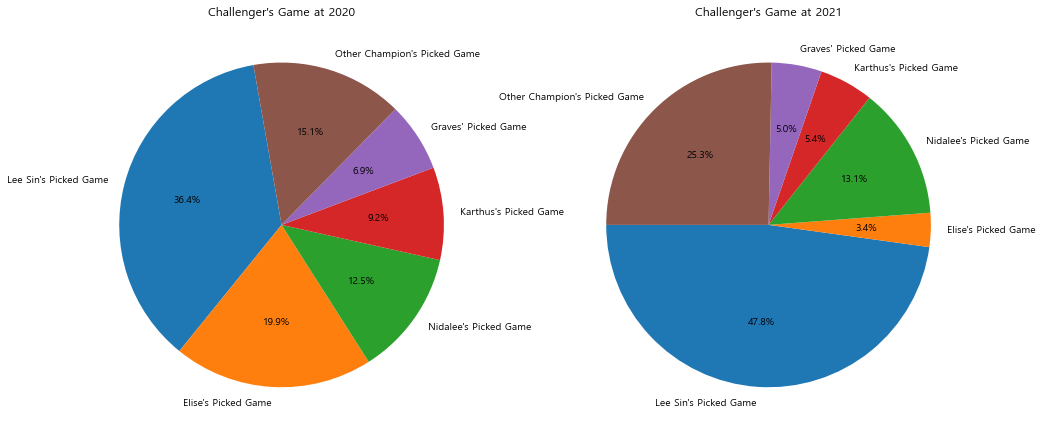

In [51]:
f,ax=plt.subplots(1,2,figsize=(16,8))
pick_20[0].plot.pie(ax=ax[0],autopct='%.1f%%', startangle=100)
ax[0].set_title("Challenger's Game at 2020")
ax[0].set_ylabel('')

pick_21[0].plot.pie(ax=ax[1],autopct='%.1f%%', startangle=180)
ax[1].set_title("Challenger's Game at 2021")
ax[1].set_ylabel('')

plt.show()

### Win Rate

In [52]:
Lee_20_blue_win=champ_bluewin_20('LeeSin')
Elise_20_blue_win=champ_bluewin_20('Elise')
Nidalee_20_blue_win=champ_bluewin_20('Nidalee')
Karthus_20_blue_win=champ_bluewin_20('Karthus')
Graves_20_blue_win=champ_bluewin_20('Graves')

Lee_21_blue_win=champ_bluewin_21('LeeSin')
Elise_21_blue_win=champ_bluewin_21('Elise')
Nidalee_21_blue_win=champ_bluewin_21('Nidalee')
Karthus_21_blue_win=champ_bluewin_21('Karthus')
Graves_21_blue_win=champ_bluewin_21('Graves')

Lee_20_red_win=champ_redwin_20('LeeSin')
Elise_20_red_win=champ_redwin_20('Elise')
Nidalee_20_red_win=champ_redwin_20('Nidalee')
Karthus_20_red_win=champ_redwin_20('Karthus')
Graves_20_red_win=champ_redwin_20('Graves')

Lee_21_red_win=champ_redwin_21('LeeSin')
Elise_21_red_win=champ_redwin_21('Elise')
Nidalee_21_red_win=champ_redwin_21('Nidalee')
Karthus_21_red_win=champ_redwin_21('Karthus')
Graves_21_red_win=champ_redwin_21('Graves')

In [53]:
Jungle_winrate=pd.DataFrame({
    '2020':[round(((len(Lee_20_blue_win)+len(Lee_20_red_win))/len(Lee_20))*100,2),
           round(((len(Elise_20_blue_win)+len(Elise_20_red_win))/len(Elise_20))*100,2),
           round(((len(Nidalee_20_blue_win)+len(Nidalee_20_red_win))/len(Nidalee_20))*100,2),
           round(((len(Karthus_20_blue_win)+len(Karthus_20_red_win))/len(Karthus_20))*100,2),
           round(((len(Graves_20_blue_win)+len(Graves_20_red_win))/len(Graves_20))*100,2)],
    '2021':[round(((len(Lee_21_blue_win)+len(Lee_21_red_win))/len(Lee_21))*100,2),
           round(((len(Elise_21_blue_win)+len(Elise_21_red_win))/len(Elise_21))*100,2),
           round(((len(Nidalee_21_blue_win)+len(Nidalee_21_red_win))/len(Nidalee_21))*100,2),
           round(((len(Karthus_21_blue_win)+len(Karthus_21_red_win))/len(Karthus_21))*100,2),
           round(((len(Graves_21_blue_win)+len(Graves_21_red_win))/len(Graves_21))*100,2)]
},index=['LeeSin','Elise','Nidalee','Karthus','Graves'])

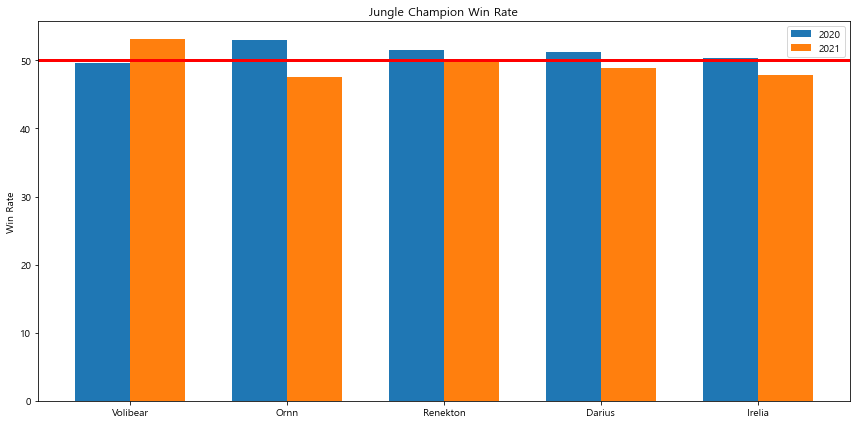

,2020,2021
LeeSin,49.67,53.06
Elise,53.03,47.61
Nidalee,51.48,49.80
Karthus,51.29,48.89
Graves,50.31,47.77


In [54]:
label=list(Top_winrate.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Jungle_winrate['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Jungle_winrate['2021'],width,label='2021')
ax.set_ylabel('Win Rate')
ax.set_title('Jungle Champion Win Rate')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=50, color='r', linewidth=3)

plt.show()
Jungle_winrate

### KDA

In [55]:
Lee_kda_20=kda_20('LeeSin')
Elise_kda_20=kda_20('Elise')
Nidalee_kda_20=kda_20('Nidalee')
Karthus_kda_20=kda_20('Karthus')
Graves_kda_20=kda_20('Graves')

Lee_kda_21=kda_21('LeeSin')
Elise_kda_21=kda_21('Elise')
Nidalee_kda_21=kda_21('Nidalee')
Karthus_kda_21=kda_21('Karthus')
Graves_kda_21=kda_21('Graves')

In [56]:
Jungle_kda=pd.DataFrame({
    '2020':[round(Lee_kda_20.mean(),2),
           round(Elise_kda_20.mean(),2),
           round(Nidalee_kda_20.mean(),2),
           round(Karthus_kda_20.mean(),2),
           round(Graves_kda_20.mean(),2)],
    '2021':[round(Lee_kda_21.mean(),2),
           round(Elise_kda_21.mean(),2),
           round(Nidalee_kda_21.mean(),2),
           round(Karthus_kda_21.mean(),2),
           round(Graves_kda_21.mean(),2)]
    },index=['LeeSin','Elise','Nidalee','Karthus','Graves'])

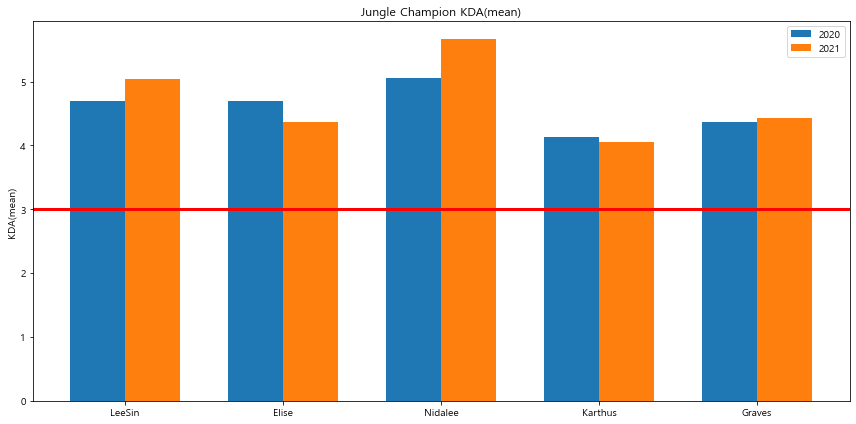

,2020,2021
LeeSin,4.69,5.04
Elise,4.69,4.37
Nidalee,5.06,5.66
Karthus,4.13,4.05
Graves,4.37,4.43


In [57]:
label=list(Jungle_kda.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Jungle_kda['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Jungle_kda['2021'],width,label='2021')
ax.set_ylabel('KDA(mean)')
ax.set_title('Jungle Champion KDA(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=3, color='r', linewidth=3)

plt.show()
Jungle_kda

### Damage Dealt

In [58]:
Lee_deal_20=champ_deal_20('LeeSin')
Elise_deal_20=champ_deal_20('Elise')
Nidalee_deal_20=champ_deal_20('Nidalee')
Karthus_deal_20=champ_deal_20('Karthus')
Graves_deal_20=champ_deal_20('Graves')

Lee_deal_21=champ_deal_21('LeeSin')
Elise_deal_21=champ_deal_21('Elise')
Nidalee_deal_21=champ_deal_21('Nidalee')
Karthus_deal_21=champ_deal_21('Karthus')
Graves_deal_21=champ_deal_21('Graves')

In [59]:
Jungle_deal=pd.DataFrame({
    '2020':[round(Lee_deal_20.mean(),2),
           round(Elise_deal_20.mean(),2),
           round(Nidalee_deal_20.mean(),2),
           round(Karthus_deal_20.mean(),2),
           round(Graves_deal_20.mean(),2)],
    '2021':[round(Lee_deal_21.mean(),2),
           round(Elise_deal_21.mean(),2),
           round(Nidalee_deal_21.mean(),2),
           round(Karthus_deal_21.mean(),2),
           round(Graves_deal_21.mean(),2)]
},index=['LeeSin','Elise','Nidalee','Karthus','Graves'])

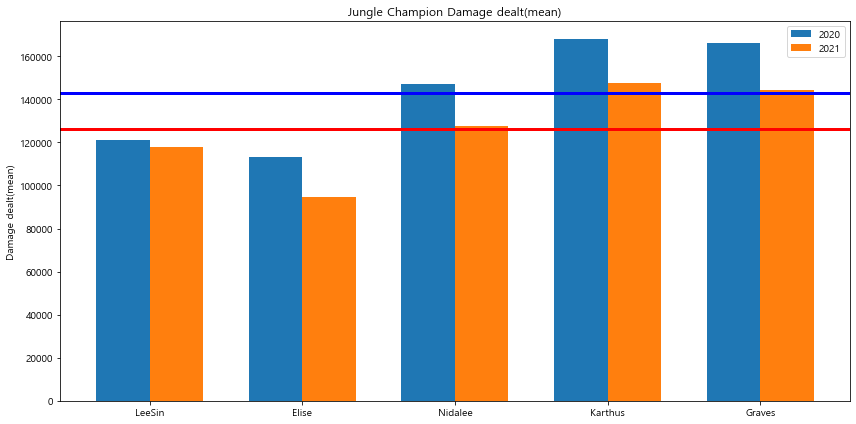

,2020,2021
LeeSin,120950.19,117682.76
Elise,113135.34,94582.38
Nidalee,146955.60,127595.33
Karthus,167777.52,147436.34
Graves,166095.86,144302.12


In [60]:
label=list(Jungle_deal.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Jungle_deal['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Jungle_deal['2021'],width,label='2021')
ax.set_ylabel('Damage dealt(mean)')
ax.set_title('Jungle Champion Damage dealt(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=Jungle_deal['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=Jungle_deal['2021'].mean(), color='r', linewidth=3)

plt.show()
Jungle_deal

### Damage Taken

In [61]:
Lee_damage_20=champ_damage_20('LeeSin')
Elise_damage_20=champ_damage_20('Elise')
Nidalee_damage_20=champ_damage_20('Nidalee')
Karthus_damage_20=champ_damage_20('Karthus')
Graves_damage_20=champ_damage_20('Graves')

Lee_damage_21=champ_damage_21('LeeSin')
Elise_damage_21=champ_damage_21('Elise')
Nidalee_damage_21=champ_damage_21('Nidalee')
Karthus_damage_21=champ_damage_21('Karthus')
Graves_damage_21=champ_damage_21('Graves')

In [62]:
Jungle_damage=pd.DataFrame({
    '2020':[round(Lee_damage_20.mean(),2),
           round(Elise_damage_20.mean(),2),
           round(Nidalee_damage_20.mean(),2),
           round(Karthus_damage_20.mean(),2),
           round(Graves_damage_20.mean(),2)],
    '2021':[round(Lee_damage_21.mean(),2),
           round(Elise_damage_21.mean(),2),
           round(Nidalee_damage_21.mean(),2),
           round(Karthus_damage_21.mean(),2),
           round(Graves_damage_21.mean(),2)]
},index=['LeeSin','Elise','Nidalee','Karthus','Graves'])

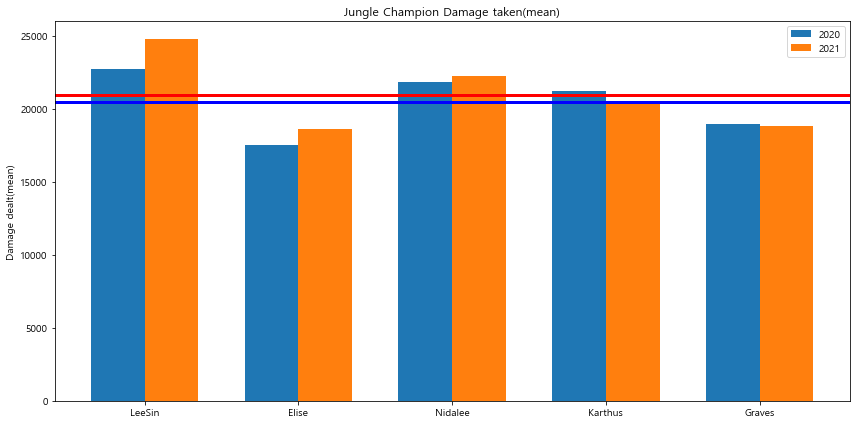

,2020,2021
LeeSin,22702.44,24753.95
Elise,17492.24,18594.61
Nidalee,21849.92,22259.82
Karthus,21223.65,20403.00
Graves,18982.71,18794.09


In [63]:
label=list(Jungle_damage.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Jungle_damage['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Jungle_damage['2021'],width,label='2021')
ax.set_ylabel('Damage dealt(mean)')
ax.set_title('Jungle Champion Damage taken(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=Jungle_damage['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=Jungle_damage['2021'].mean(), color='r', linewidth=3)

plt.show()
Jungle_damage

## MID

In [64]:
Zed_20=champ_data_20('Zed')
Leblanc_20=champ_data_20('Leblanc')
Galio_20=champ_data_20('Galio')
Yasuo_20=champ_data_20('Yasuo')
Sylas_20=champ_data_20('Sylas')

Zed_21=champ_data_21('Zed')
Leblanc_21=champ_data_21('Leblanc')
Galio_21=champ_data_21('Galio')
Yasuo_21=champ_data_21('Yasuo')
Sylas_21=champ_data_21('Sylas')

### Pick Rate

In [65]:
pick_20=pd.DataFrame({
    "Zed's Picked Game":len(Zed_20),
    "Leblanc's Picked Game":len(Leblanc_20),
    "Galio's Picked Game": len(Galio_20),
    "Yasuo's Picked Game": len(Yasuo_20),
    "Sylas's Picked Game": len(Sylas_20),
    "Other Champion's Picked Game":(len(match_20)-len(Zed_20)-len(Leblanc_20)-len(Galio_20)-len(Yasuo_20)-len(Sylas_20))
    },index=[0]).T

pick_21=pd.DataFrame({
    "Zed's Picked Game":len(Zed_21),
    "Leblanc's Picked Game":len(Leblanc_21),
    "Galio's Picked Game": len(Galio_21),
    "Yasuo's Picked Game": len(Yasuo_21),
    "Sylas's Picked Game": len(Sylas_21),
    "Other Champion's Picked Game":(len(match_21)-len(Zed_21)-len(Leblanc_21)-len(Galio_21)-len(Yasuo_21)-len(Sylas_21))
    },index=[0]).T

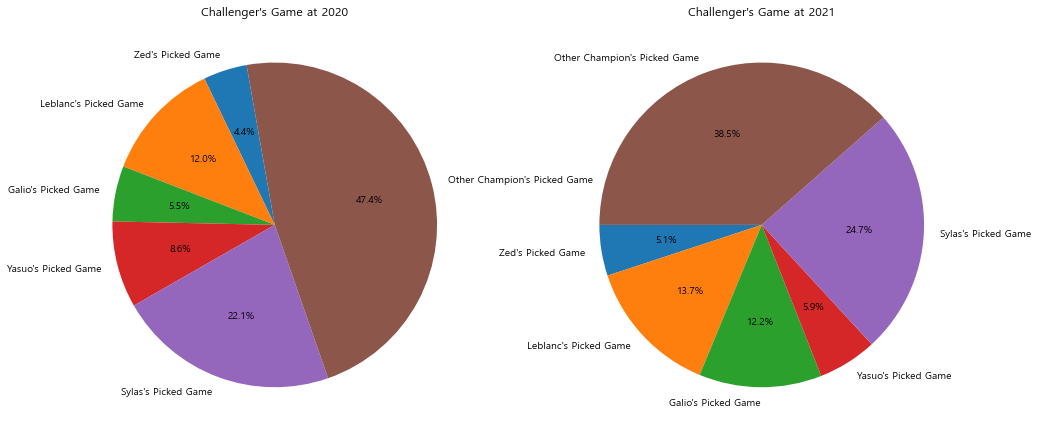

In [66]:
f,ax=plt.subplots(1,2,figsize=(16,8))
pick_20[0].plot.pie(ax=ax[0],autopct='%.1f%%', startangle=100)
ax[0].set_title("Challenger's Game at 2020")
ax[0].set_ylabel('')

pick_21[0].plot.pie(ax=ax[1],autopct='%.1f%%', startangle=180)
ax[1].set_title("Challenger's Game at 2021")
ax[1].set_ylabel('')

plt.show()

### Win Rate

In [67]:
Zed_20_blue_win=champ_bluewin_20('Zed')
Leblanc_20_blue_win=champ_bluewin_20('Leblanc')
Galio_20_blue_win=champ_bluewin_20('Galio')
Yasuo_20_blue_win=champ_bluewin_20('Yasuo')
Sylas_20_blue_win=champ_bluewin_20('Sylas')

Zed_21_blue_win=champ_bluewin_21('Zed')
Leblanc_21_blue_win=champ_bluewin_21('Leblanc')
Galio_21_blue_win=champ_bluewin_21('Galio')
Yasuo_21_blue_win=champ_bluewin_21('Yasuo')
Sylas_21_blue_win=champ_bluewin_21('Sylas')

Zed_20_red_win=champ_redwin_20('Zed')
Leblanc_20_red_win=champ_redwin_20('Leblanc')
Galio_20_red_win=champ_redwin_20('Galio')
Yasuo_20_red_win=champ_redwin_20('Yasuo')
Sylas_20_red_win=champ_redwin_20('Sylas')

Zed_21_red_win=champ_redwin_21('Zed')
Leblanc_21_red_win=champ_redwin_21('Leblanc')
Galio_21_red_win=champ_redwin_21('Galio')
Yasuo_21_red_win=champ_redwin_21('Yasuo')
Sylas_21_red_win=champ_redwin_21('Sylas')

In [68]:
MID_winrate=pd.DataFrame({
    '2020':[round(((len(Zed_20_blue_win)+len(Zed_20_red_win))/len(Zed_20))*100,2),
           round(((len(Leblanc_20_blue_win)+len(Leblanc_20_red_win))/len(Leblanc_20))*100,2),
           round(((len(Galio_20_blue_win)+len(Galio_20_red_win))/len(Galio_20))*100,2),
           round(((len(Yasuo_20_blue_win)+len(Yasuo_20_red_win))/len(Yasuo_20))*100,2),
           round(((len(Sylas_20_blue_win)+len(Sylas_20_red_win))/len(Sylas_20))*100,2)],
    '2021':[round(((len(Zed_21_blue_win)+len(Zed_21_red_win))/len(Zed_21))*100,2),
           round(((len(Leblanc_21_blue_win)+len(Leblanc_21_red_win))/len(Leblanc_21))*100,2),
           round(((len(Galio_21_blue_win)+len(Galio_21_red_win))/len(Galio_21))*100,2),
           round(((len(Yasuo_21_blue_win)+len(Yasuo_21_red_win))/len(Yasuo_21))*100,2),
           round(((len(Sylas_21_blue_win)+len(Sylas_21_red_win))/len(Sylas_21))*100,2)]
},index=['Zed','Leblanc','Galio','Yasuo','Sylas'])

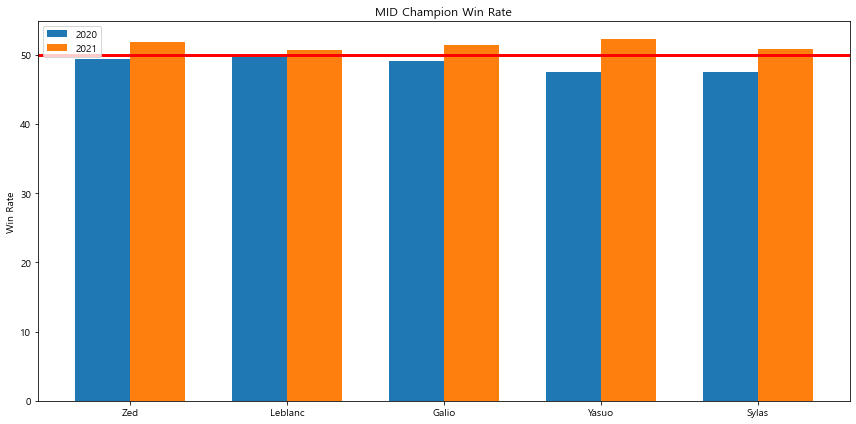

,2020,2021
Zed,49.46,51.94
Leblanc,49.74,50.75
Galio,49.12,51.40
Yasuo,47.54,52.25
Sylas,47.59,50.85


In [69]:
label=list(MID_winrate.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,MID_winrate['2020'],width,label='2020')
rect2=ax.bar(x+width/2,MID_winrate['2021'],width,label='2021')
ax.set_ylabel('Win Rate')
ax.set_title('MID Champion Win Rate')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=50, color='r', linewidth=3)

plt.show()
MID_winrate

### KDA

In [70]:
Zed_kda_20=kda_20('Zed')
Leblanc_kda_20=kda_20('Leblanc')
Galio_kda_20=kda_20('Galio')
Yasuo_kda_20=kda_20('Yasuo')
Sylas_kda_20=kda_20('Sylas')

Zed_kda_21=kda_21('Zed')
Leblanc_kda_21=kda_21('Leblanc')
Galio_kda_21=kda_21('Galio')
Yasuo_kda_21=kda_21('Yasuo')
Sylas_kda_21=kda_21('Sylas')

In [71]:
MID_kda=pd.DataFrame({
    '2020':[round(Zed_kda_20.mean(),2),
           round(Leblanc_kda_20.mean(),2),
           round(Galio_kda_20.mean(),2),
           round(Yasuo_kda_20.mean(),2),
           round(Sylas_kda_20.mean(),2)],
    '2021':[round(Zed_kda_21.mean(),2),
           round(Leblanc_kda_21.mean(),2),
           round(Galio_kda_21.mean(),2),
           round(Yasuo_kda_21.mean(),2),
           round(Sylas_kda_21.mean(),2)]
    },index=['Zed','Leblanc','Galio','Yasuo','Sylas'])

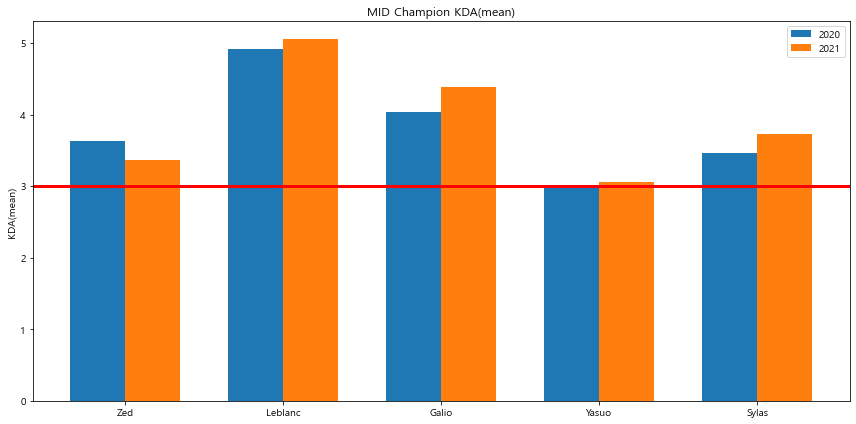

,2020,2021
Zed,3.63,3.37
Leblanc,4.91,5.05
Galio,4.03,4.39
Yasuo,2.97,3.06
Sylas,3.47,3.73


In [72]:
label=list(MID_kda.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,MID_kda['2020'],width,label='2020')
rect2=ax.bar(x+width/2,MID_kda['2021'],width,label='2021')
ax.set_ylabel('KDA(mean)')
ax.set_title('MID Champion KDA(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=3, color='r', linewidth=3)

plt.show()
MID_kda

### Damage Dealt

In [73]:
Zed_deal_20=champ_deal_20('Zed')
Leblanc_deal_20=champ_deal_20('Leblanc')
Galio_deal_20=champ_deal_20('Galio')
Yasuo_deal_20=champ_deal_20('Yasuo')
Sylas_deal_20=champ_deal_20('Sylas')

Zed_deal_21=champ_deal_21('Zed')
Leblanc_deal_21=champ_deal_21('Leblanc')
Galio_deal_21=champ_deal_21('Galio')
Yasuo_deal_21=champ_deal_21('Yasuo')
Sylas_deal_21=champ_deal_21('Sylas')

In [74]:
MID_deal=pd.DataFrame({
    '2020':[round(Zed_deal_20.mean(),2),
           round(Leblanc_deal_20.mean(),2),
           round(Galio_deal_20.mean(),2),
           round(Yasuo_deal_20.mean(),2),
           round(Sylas_deal_20.mean(),2)],
    '2021':[round(Zed_deal_21.mean(),2),
           round(Leblanc_deal_21.mean(),2),
           round(Galio_deal_21.mean(),2),
           round(Yasuo_deal_21.mean(),2),
           round(Sylas_deal_21.mean(),2)]
},index=['Zed','Leblanc','Galio','Yasuo','Sylas'])

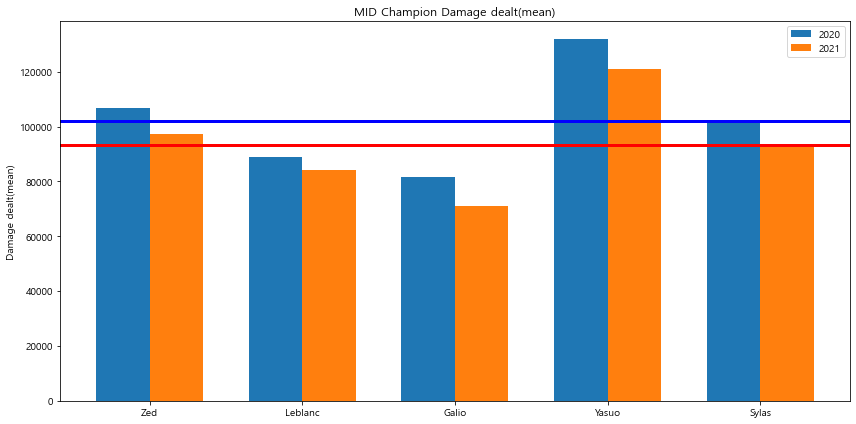

,2020,2021
Zed,106734.04,97251.98
Leblanc,89030.05,84191.88
Galio,81490.07,70904.31
Yasuo,131732.32,120987.53
Sylas,101832.41,92455.45


In [75]:
label=list(MID_deal.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,MID_deal['2020'],width,label='2020')
rect2=ax.bar(x+width/2,MID_deal['2021'],width,label='2021')
ax.set_ylabel('Damage dealt(mean)')
ax.set_title('MID Champion Damage dealt(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=MID_deal['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=MID_deal['2021'].mean(), color='r', linewidth=3)

plt.show()
MID_deal

### Damage Taken

In [76]:
Zed_damage_20=champ_damage_20('Zed')
Leblanc_damage_20=champ_damage_20('Leblanc')
Galio_damage_20=champ_damage_20('Galio')
Yasuo_damage_20=champ_damage_20('Yasuo')
Sylas_damage_20=champ_damage_20('Sylas')

Zed_damage_21=champ_damage_21('Zed')
Leblanc_damage_21=champ_damage_21('Leblanc')
Galio_damage_21=champ_damage_21('Galio')
Yasuo_damage_21=champ_damage_21('Yasuo')
Sylas_damage_21=champ_damage_21('Sylas')

In [77]:
MID_damage=pd.DataFrame({
    '2020':[round(Zed_damage_20.mean(),2),
           round(Leblanc_damage_20.mean(),2),
           round(Galio_damage_20.mean(),2),
           round(Yasuo_damage_20.mean(),2),
           round(Sylas_damage_20.mean(),2)],
    '2021':[round(Zed_damage_21.mean(),2),
           round(Leblanc_damage_21.mean(),2),
           round(Galio_damage_21.mean(),2),
           round(Yasuo_damage_21.mean(),2),
           round(Sylas_damage_21.mean(),2)]
},index=['Zed','Leblanc','Galio','Yasuo','Sylas'])

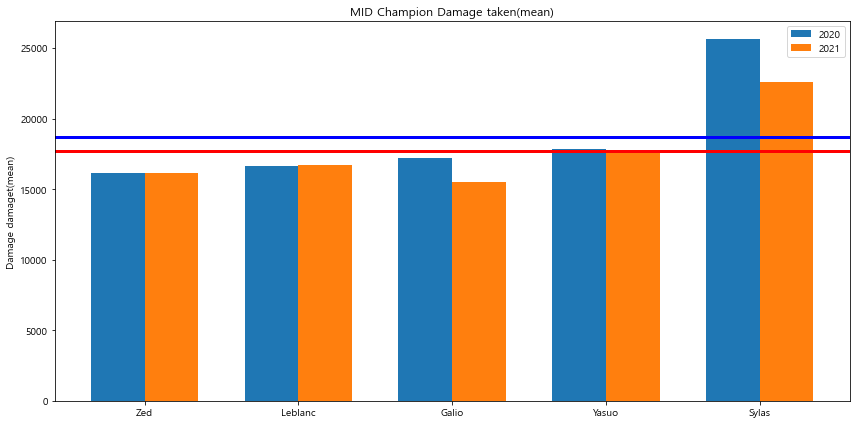

,2020,2021
Zed,16181.18,16131.00
Leblanc,16655.80,16744.87
Galio,17236.33,15494.99
Yasuo,17881.87,17583.94
Sylas,25618.34,22576.68


In [78]:
label=list(MID_damage.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,MID_damage['2020'],width,label='2020')
rect2=ax.bar(x+width/2,MID_damage['2021'],width,label='2021')
ax.set_ylabel('Damage damaget(mean)')
ax.set_title('MID Champion Damage taken(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=MID_damage['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=MID_damage['2021'].mean(), color='r', linewidth=3)

plt.show()
MID_damage

## AD Carry

In [79]:
Vayne_20=champ_data_20('Vayne')
Ezreal_20=champ_data_20('Ezreal')
Jhin_20=champ_data_20('Jhin')
Kaisa_20=champ_data_20('Kaisa')
Lucian_20=champ_data_20('Lucian')

Vayne_21=champ_data_21('Vayne')
Ezreal_21=champ_data_21('Ezreal')
Jhin_21=champ_data_21('Jhin')
Kaisa_21=champ_data_21('Kaisa')
Lucian_21=champ_data_21('Lucian')

In [80]:
pick_20=pd.DataFrame({
    "Vayne's Picked Game":len(Vayne_20),
    "Ezreal's Picked Game":len(Ezreal_20),
    "Jhin's Picked Game": len(Jhin_20),
    "Kaisa's Picked Game": len(Kaisa_20),
    "Lucian's Picked Game": len(Lucian_20),
    "Other Champion's Picked Game":(len(match_20)-len(Vayne_20)-len(Ezreal_20)-len(Jhin_20)-len(Kaisa_20)-len(Lucian_20))
    },index=[0]).T

pick_21=pd.DataFrame({
    "Vayne's Picked Game":len(Vayne_21),
    "Ezreal's Picked Game":len(Ezreal_21),
    "Jhin's Picked Game": len(Jhin_21),
    "Kaisa's Picked Game": len(Kaisa_21),
    "Lucian's Picked Game": len(Lucian_21),
    "Other Champion's Picked Game":(len(match_21)-len(Vayne_21)-len(Ezreal_21)-len(Jhin_21)-len(Kaisa_21)-len(Lucian_21))
    },index=[0]).T

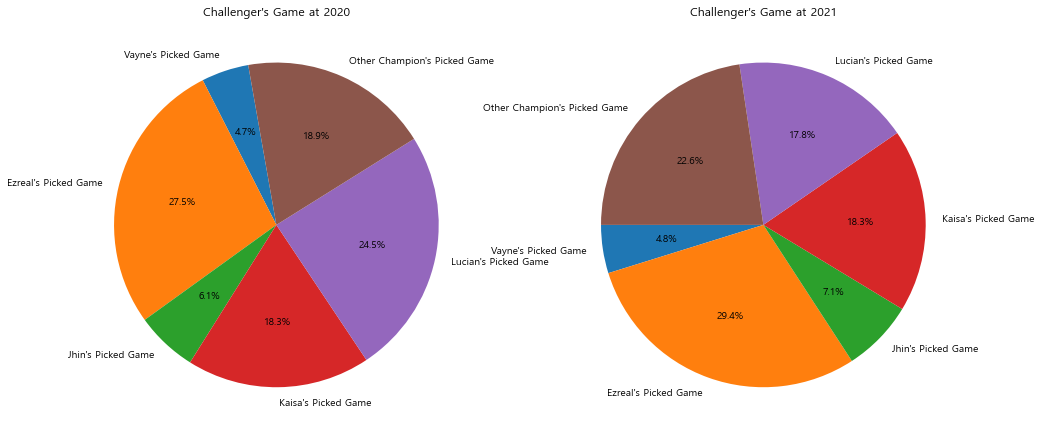

In [81]:
f,ax=plt.subplots(1,2,figsize=(16,8))
pick_20[0].plot.pie(ax=ax[0],autopct='%.1f%%', startangle=100)
ax[0].set_title("Challenger's Game at 2020")
ax[0].set_ylabel('')

pick_21[0].plot.pie(ax=ax[1],autopct='%.1f%%', startangle=180)
ax[1].set_title("Challenger's Game at 2021")
ax[1].set_ylabel('')

plt.show()

### Win Rate

In [82]:
Vayne_20_blue_win=champ_bluewin_20('Vayne')
Ezreal_20_blue_win=champ_bluewin_20('Ezreal')
Jhin_20_blue_win=champ_bluewin_20('Jhin')
Kaisa_20_blue_win=champ_bluewin_20('Kaisa')
Lucian_20_blue_win=champ_bluewin_20('Lucian')

Vayne_21_blue_win=champ_bluewin_21('Vayne')
Ezreal_21_blue_win=champ_bluewin_21('Ezreal')
Jhin_21_blue_win=champ_bluewin_21('Jhin')
Kaisa_21_blue_win=champ_bluewin_21('Kaisa')
Lucian_21_blue_win=champ_bluewin_21('Lucian')

Vayne_20_red_win=champ_redwin_20('Vayne')
Ezreal_20_red_win=champ_redwin_20('Ezreal')
Jhin_20_red_win=champ_redwin_20('Jhin')
Kaisa_20_red_win=champ_redwin_20('Kaisa')
Lucian_20_red_win=champ_redwin_20('Lucian')

Vayne_21_red_win=champ_redwin_21('Vayne')
Ezreal_21_red_win=champ_redwin_21('Ezreal')
Jhin_21_red_win=champ_redwin_21('Jhin')
Kaisa_21_red_win=champ_redwin_21('Kaisa')
Lucian_21_red_win=champ_redwin_21('Lucian')

In [83]:
AD_winrate=pd.DataFrame({
    '2020':[round(((len(Vayne_20_blue_win)+len(Vayne_20_red_win))/len(Vayne_20))*100,2),
           round(((len(Ezreal_20_blue_win)+len(Ezreal_20_red_win))/len(Ezreal_20))*100,2),
           round(((len(Kaisa_20_blue_win)+len(Kaisa_20_red_win))/len(Kaisa_20))*100,2),
           round(((len(Jhin_20_blue_win)+len(Jhin_20_red_win))/len(Jhin_20))*100,2),
           round(((len(Lucian_20_blue_win)+len(Lucian_20_red_win))/len(Lucian_20))*100,2)],
    '2021':[round(((len(Vayne_21_blue_win)+len(Vayne_21_red_win))/len(Vayne_21))*100,2),
           round(((len(Ezreal_21_blue_win)+len(Ezreal_21_red_win))/len(Ezreal_21))*100,2),
           round(((len(Kaisa_21_blue_win)+len(Kaisa_21_red_win))/len(Kaisa_21))*100,2),
           round(((len(Jhin_21_blue_win)+len(Jhin_21_red_win))/len(Jhin_21))*100,2),
           round(((len(Lucian_21_blue_win)+len(Lucian_21_red_win))/len(Lucian_21))*100,2)]
},index=['Vayne','Ezreal','Kaisa','Jhin','Lucian'])

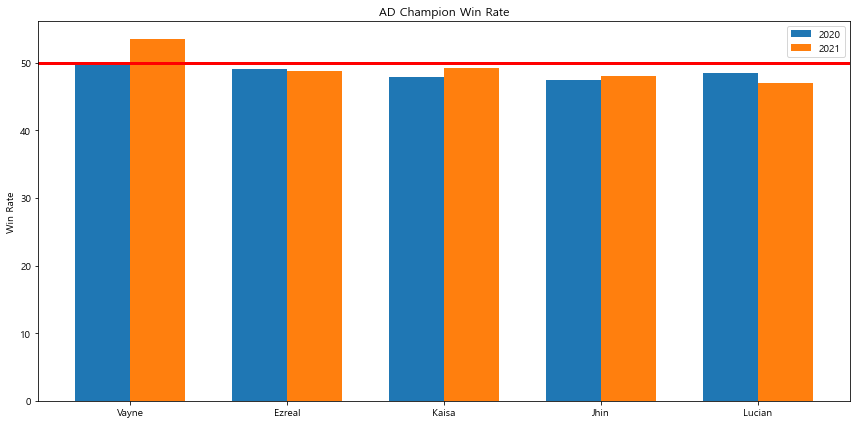

,2020,2021
Vayne,49.92,53.46
Ezreal,49.05,48.75
Kaisa,47.94,49.25
Jhin,47.46,48.09
Lucian,48.53,47.07


In [84]:
label=list(AD_winrate.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,AD_winrate['2020'],width,label='2020')
rect2=ax.bar(x+width/2,AD_winrate['2021'],width,label='2021')
ax.set_ylabel('Win Rate')
ax.set_title('AD Champion Win Rate')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=50, color='r', linewidth=3)

plt.show()
AD_winrate

### KDA

In [85]:
Vayne_kda_20=kda_20('Vayne')
Ezreal_kda_20=kda_20('Ezreal')
Jhin_kda_20=kda_20('Jhin')
Kaisa_kda_20=kda_20('Kaisa')
Lucian_kda_20=kda_20('Lucian')

Vayne_kda_21=kda_21('Vayne')
Ezreal_kda_21=kda_21('Ezreal')
Jhin_kda_21=kda_21('Jhin')
Kaisa_kda_21=kda_21('Kaisa')
Lucian_kda_21=kda_21('Lucian')

In [86]:
AD_kda=pd.DataFrame({
    '2020':[round(Vayne_kda_20.mean(),2),
           round(Ezreal_kda_20.mean(),2),
           round(Jhin_kda_20.mean(),2),
           round(Kaisa_kda_20.mean(),2),
           round(Lucian_kda_20.mean(),2)],
    '2021':[round(Vayne_kda_21.mean(),2),
           round(Ezreal_kda_21.mean(),2),
           round(Jhin_kda_21.mean(),2),
           round(Kaisa_kda_21.mean(),2),
           round(Lucian_kda_21.mean(),2)]
    },index=['Vayne','Ezreal','Jhin','Kaisa','Lucian'])

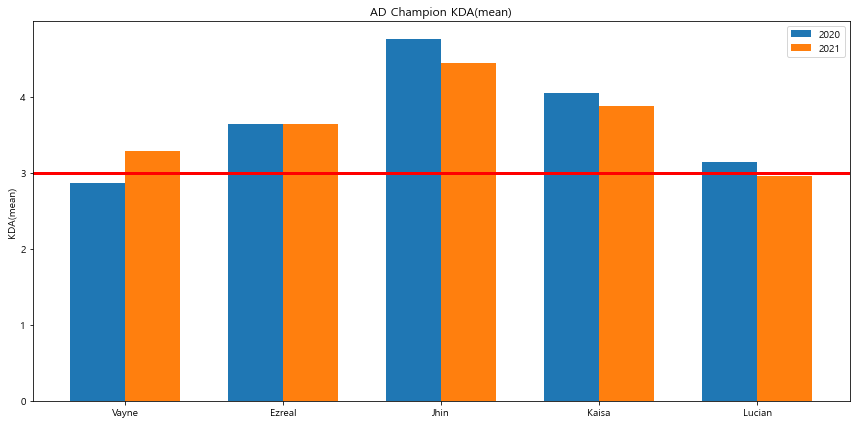

,2020,2021
Vayne,2.87,3.29
Ezreal,3.65,3.65
Jhin,4.76,4.45
Kaisa,4.05,3.89
Lucian,3.15,2.96


In [87]:
label=list(AD_kda.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,AD_kda['2020'],width,label='2020')
rect2=ax.bar(x+width/2,AD_kda['2021'],width,label='2021')
ax.set_ylabel('KDA(mean)')
ax.set_title('AD Champion KDA(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=3, color='r', linewidth=3)

plt.show()
AD_kda

### Damage Dealt

In [88]:
Vayne_deal_20=champ_deal_20('Vayne')
Ezreal_deal_20=champ_deal_20('Ezreal')
Jhin_deal_20=champ_deal_20('Jhin')
Kaisa_deal_20=champ_deal_20('Kaisa')
Lucian_deal_20=champ_deal_20('Lucian')

Vayne_deal_21=champ_deal_21('Vayne')
Ezreal_deal_21=champ_deal_21('Ezreal')
Jhin_deal_21=champ_deal_21('Jhin')
Kaisa_deal_21=champ_deal_21('Kaisa')
Lucian_deal_21=champ_deal_21('Lucian')

In [89]:
AD_deal=pd.DataFrame({
    '2020':[round(Vayne_deal_20.mean(),2),
           round(Ezreal_deal_20.mean(),2),
           round(Jhin_deal_20.mean(),2),
           round(Kaisa_deal_20.mean(),2),
           round(Lucian_deal_20.mean(),2)],
    '2021':[round(Vayne_deal_21.mean(),2),
           round(Ezreal_deal_21.mean(),2),
           round(Jhin_deal_21.mean(),2),
           round(Kaisa_deal_21.mean(),2),
           round(Lucian_deal_21.mean(),2)]
},index=['Vayne','Ezreal','Jhin','Kaisa','Lucian'])

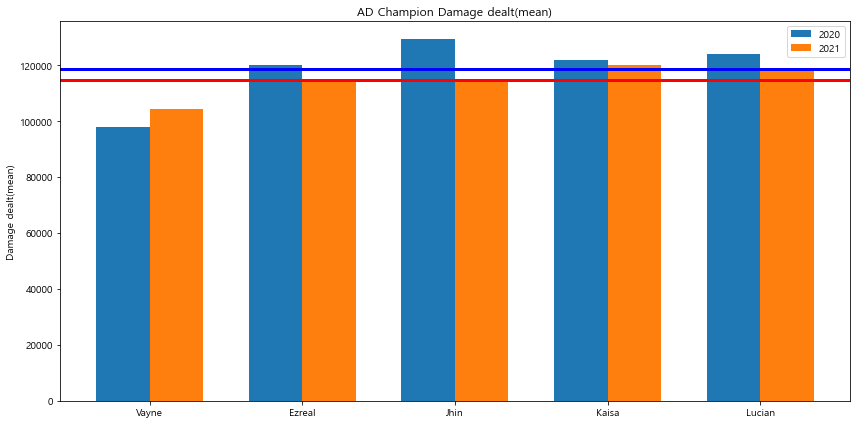

,2020,2021
Vayne,98047.35,104416.77
Ezreal,120171.52,114603.19
Jhin,129277.39,115252.61
Kaisa,121772.30,120065.79
Lucian,124166.27,118861.66


In [90]:
label=list(AD_deal.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,AD_deal['2020'],width,label='2020')
rect2=ax.bar(x+width/2,AD_deal['2021'],width,label='2021')
ax.set_ylabel('Damage dealt(mean)')
ax.set_title('AD Champion Damage dealt(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=AD_deal['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=AD_deal['2021'].mean(), color='r', linewidth=3)

plt.show()
AD_deal

### Damage Taken

In [91]:
Vayne_damage_20=champ_damage_20('Vayne')
Ezreal_damage_20=champ_damage_20('Ezreal')
Jhin_damage_20=champ_damage_20('Jhin')
Kaisa_damage_20=champ_damage_20('Kaisa')
Lucian_damage_20=champ_damage_20('Lucian')

Vayne_damage_21=champ_damage_21('Vayne')
Ezreal_damage_21=champ_damage_21('Ezreal')
Jhin_damage_21=champ_damage_21('Jhin')
Kaisa_damage_21=champ_damage_21('Kaisa')
Lucian_damage_21=champ_damage_21('Lucian')

In [92]:
AD_damage=pd.DataFrame({
    '2020':[round(Vayne_damage_20.mean(),2),
           round(Ezreal_damage_20.mean(),2),
           round(Jhin_damage_20.mean(),2),
           round(Kaisa_damage_20.mean(),2),
           round(Lucian_damage_20.mean(),2)],
    '2021':[round(Vayne_damage_21.mean(),2),
           round(Ezreal_damage_21.mean(),2),
           round(Jhin_damage_21.mean(),2),
           round(Kaisa_damage_21.mean(),2),
           round(Lucian_damage_21.mean(),2)]
},index=['Vayne','Ezreal','Jhin','Kaisa','Lucian'])

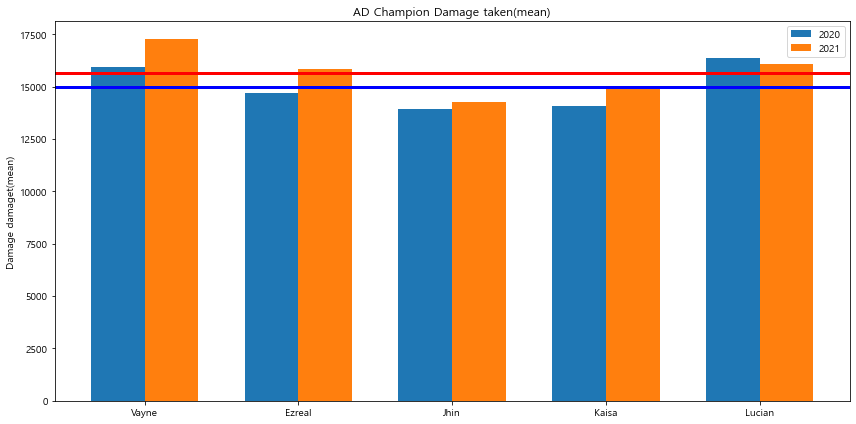

,2020,2021
Vayne,15935.31,17254.96
Ezreal,14683.95,15823.40
Jhin,13941.23,14257.33
Kaisa,14057.91,14903.11
Lucian,16356.27,16061.62


In [93]:
label=list(AD_damage.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,AD_damage['2020'],width,label='2020')
rect2=ax.bar(x+width/2,AD_damage['2021'],width,label='2021')
ax.set_ylabel('Damage damaget(mean)')
ax.set_title('AD Champion Damage taken(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=AD_damage['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=AD_damage['2021'].mean(), color='r', linewidth=3)

plt.show()
AD_damage

## Support

In [94]:
Leona_20=champ_data_20('Leona')
Alistar_20=champ_data_20('Alistar')
Thresh_20=champ_data_20('Thresh')
Blitzcrank_20=champ_data_20('Blitzcrank')
Lulu_20=champ_data_20('Lulu')

Leona_21=champ_data_21('Leona')
Alistar_21=champ_data_21('Alistar')
Thresh_21=champ_data_21('Thresh')
Blitzcrank_21=champ_data_21('Blitzcrank')
Lulu_21=champ_data_21('Lulu')

### Pick Rate

In [95]:
pick_20=pd.DataFrame({
    "Leona's Picked Game":len(Leona_20),
    "Alistar's Picked Game":len(Alistar_20),
    "Thresh's Picked Game": len(Thresh_20),
    "Blitzcrank's Picked Game": len(Blitzcrank_20),
    "Lulu's Picked Game": len(Lulu_20),
    "Other Champion's Picked Game":(len(match_20)-len(Leona_20)-len(Alistar_20)-len(Thresh_20)-len(Blitzcrank_20)-len(Lulu_20))
    },index=[0]).T

pick_21=pd.DataFrame({
    "Leona's Picked Game":len(Leona_21),
    "Alistar's Picked Game":len(Alistar_21),
    "Thresh's Picked Game": len(Thresh_21),
    "Blitzcrank's Picked Game": len(Blitzcrank_21),
    "Lulu's Picked Game": len(Lulu_21),
    "Other Champion's Picked Game":(len(match_21)-len(Leona_21)-len(Alistar_21)-len(Thresh_21)-len(Blitzcrank_21)-len(Lulu_21))
    },index=[0]).T


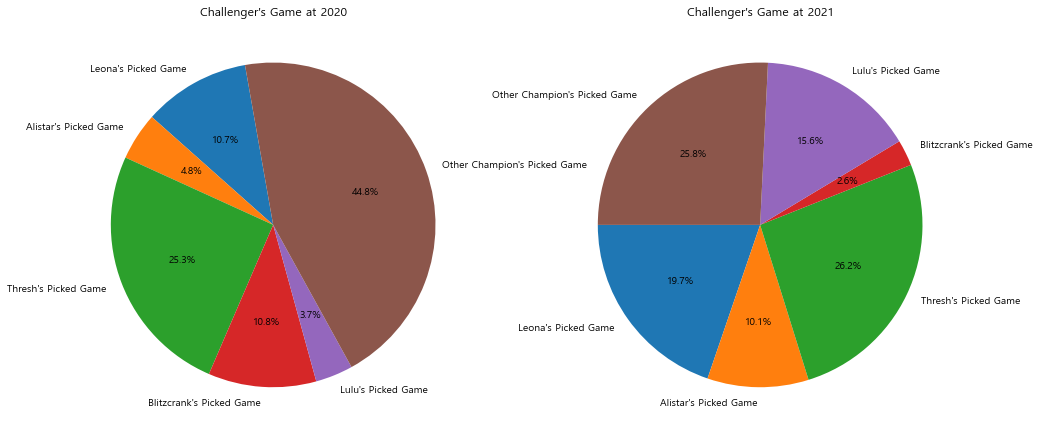

In [96]:
f,ax=plt.subplots(1,2,figsize=(16,8))
pick_20[0].plot.pie(ax=ax[0],autopct='%.1f%%', startangle=100)
ax[0].set_title("Challenger's Game at 2020")
ax[0].set_ylabel('')

pick_21[0].plot.pie(ax=ax[1],autopct='%.1f%%', startangle=180)
ax[1].set_title("Challenger's Game at 2021")
ax[1].set_ylabel('')

plt.show()

### Win Rate

In [97]:
Leona_20_blue_win=champ_bluewin_20('Leona')
Alistar_20_blue_win=champ_bluewin_20('Alistar')
Thresh_20_blue_win=champ_bluewin_20('Thresh')
Blitzcrank_20_blue_win=champ_bluewin_20('Blitzcrank')
Lulu_20_blue_win=champ_bluewin_20('Lulu')

Leona_21_blue_win=champ_bluewin_21('Leona')
Alistar_21_blue_win=champ_bluewin_21('Alistar')
Thresh_21_blue_win=champ_bluewin_21('Thresh')
Blitzcrank_21_blue_win=champ_bluewin_21('Blitzcrank')
Lulu_21_blue_win=champ_bluewin_21('Lulu')

Leona_20_red_win=champ_redwin_20('Leona')
Alistar_20_red_win=champ_redwin_20('Alistar')
Thresh_20_red_win=champ_redwin_20('Thresh')
Blitzcrank_20_red_win=champ_redwin_20('Blitzcrank')
Lulu_20_red_win=champ_redwin_20('Lulu')

Leona_21_red_win=champ_redwin_21('Leona')
Alistar_21_red_win=champ_redwin_21('Alistar')
Thresh_21_red_win=champ_redwin_21('Thresh')
Blitzcrank_21_red_win=champ_redwin_21('Blitzcrank')
Lulu_21_red_win=champ_redwin_21('Lulu')

In [98]:
Sup_winrate=pd.DataFrame({
    '2020':[round(((len(Leona_20_blue_win)+len(Leona_20_red_win))/len(Leona_20))*100,2),
           round(((len(Alistar_20_blue_win)+len(Alistar_20_red_win))/len(Alistar_20))*100,2),
           round(((len(Thresh_20_blue_win)+len(Thresh_20_red_win))/len(Thresh_20))*100,2),
           round(((len(Blitzcrank_20_blue_win)+len(Blitzcrank_20_red_win))/len(Blitzcrank_20))*100,2),
           round(((len(Lulu_20_blue_win)+len(Lulu_20_red_win))/len(Lulu_20))*100,2)],
    '2021':[round(((len(Leona_21_blue_win)+len(Leona_21_red_win))/len(Leona_21))*100,2),
           round(((len(Alistar_21_blue_win)+len(Alistar_21_red_win))/len(Alistar_21))*100,2),
           round(((len(Thresh_21_blue_win)+len(Thresh_21_red_win))/len(Thresh_21))*100,2),
           round(((len(Blitzcrank_21_blue_win)+len(Blitzcrank_21_red_win))/len(Blitzcrank_21))*100,2),
           round(((len(Lulu_21_blue_win)+len(Lulu_21_red_win))/len(Lulu_21))*100,2)]
},index=['Leona','Alistar','Thresh','Blitzcrank','Lulu'])

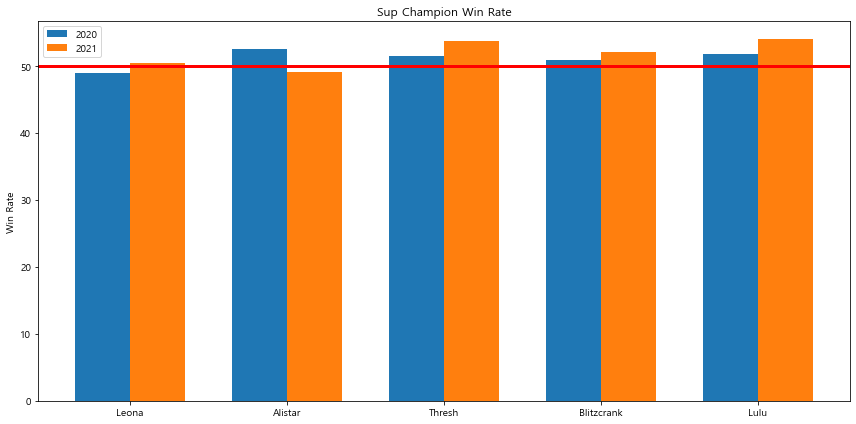

,2020,2021
Leona,48.98,50.54
Alistar,52.57,49.20
Thresh,51.47,53.78
Blitzcrank,50.90,52.15
Lulu,51.88,54.01


In [99]:
label=list(Sup_winrate.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Sup_winrate['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Sup_winrate['2021'],width,label='2021')
ax.set_ylabel('Win Rate')
ax.set_title('Sup Champion Win Rate')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=50, color='r', linewidth=3)

plt.show()
Sup_winrate

### KDA

In [100]:
Leona_kda_20=kda_20('Leona')
Alistar_kda_20=kda_20('Alistar')
Thresh_kda_20=kda_20('Thresh')
Blitzcrank_kda_20=kda_20('Blitzcrank')
Lulu_kda_20=kda_20('Lulu')

Leona_kda_21=kda_21('Leona')
Alistar_kda_21=kda_21('Alistar')
Thresh_kda_21=kda_21('Thresh')
Blitzcrank_kda_21=kda_21('Blitzcrank')
Lulu_kda_21=kda_21('Lulu')

In [101]:
Sup_kda=pd.DataFrame({
    '2020':[round(Leona_kda_20.mean(),2),
           round(Alistar_kda_20.mean(),2),
           round(Thresh_kda_20.mean(),2),
           round(Blitzcrank_kda_20.mean(),2),
           round(Lulu_kda_20.mean(),2)],
    '2021':[round(Leona_kda_21.mean(),2),
           round(Alistar_kda_21.mean(),2),
           round(Thresh_kda_21.mean(),2),
           round(Blitzcrank_kda_21.mean(),2),
           round(Lulu_kda_21.mean(),2)]
    },index=['Leona','Alistar','Thresh','Blitzcrank','Lulu'])

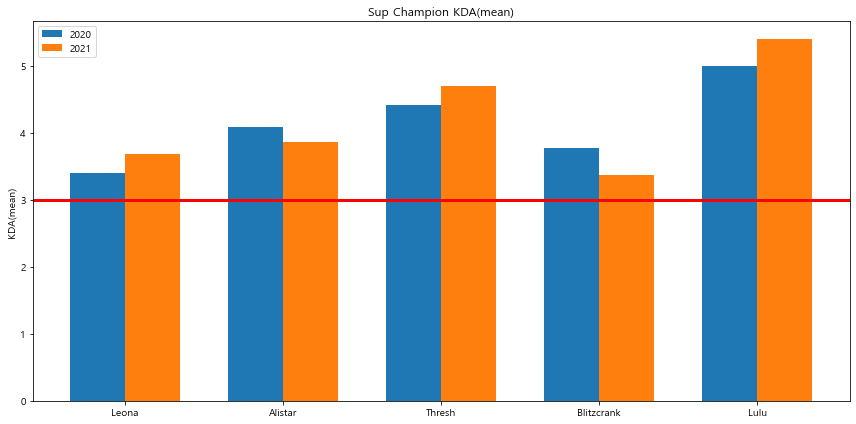

,2020,2021
Leona,3.40,3.68
Alistar,4.08,3.86
Thresh,4.41,4.70
Blitzcrank,3.77,3.37
Lulu,5.00,5.39


In [102]:
label=list(Sup_kda.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Sup_kda['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Sup_kda['2021'],width,label='2021')
ax.set_ylabel('KDA(mean)')
ax.set_title('Sup Champion KDA(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=3, color='r', linewidth=3)

plt.show()
Sup_kda

### Damage Dealt

In [103]:
Leona_deal_20=champ_deal_20('Leona')
Alistar_deal_20=champ_deal_20('Alistar')
Thresh_deal_20=champ_deal_20('Thresh')
Blitzcrank_deal_20=champ_deal_20('Blitzcrank')
Lulu_deal_20=champ_deal_20('Lulu')

Leona_deal_21=champ_deal_21('Leona')
Alistar_deal_21=champ_deal_21('Alistar')
Thresh_deal_21=champ_deal_21('Thresh')
Blitzcrank_deal_21=champ_deal_21('Blitzcrank')
Lulu_deal_21=champ_deal_21('Lulu')

In [104]:
Sup_deal=pd.DataFrame({
    '2020':[round(Leona_deal_20.mean(),2),
           round(Alistar_deal_20.mean(),2),
           round(Thresh_deal_20.mean(),2),
           round(Blitzcrank_deal_20.mean(),2),
           round(Lulu_deal_20.mean(),2)],
    '2021':[round(Leona_deal_21.mean(),2),
           round(Alistar_deal_21.mean(),2),
           round(Thresh_deal_21.mean(),2),
           round(Blitzcrank_deal_21.mean(),2),
           round(Lulu_deal_21.mean(),2)]
},index=['Leona','Alistar','Thresh','Blitzcrank','Lulu'])

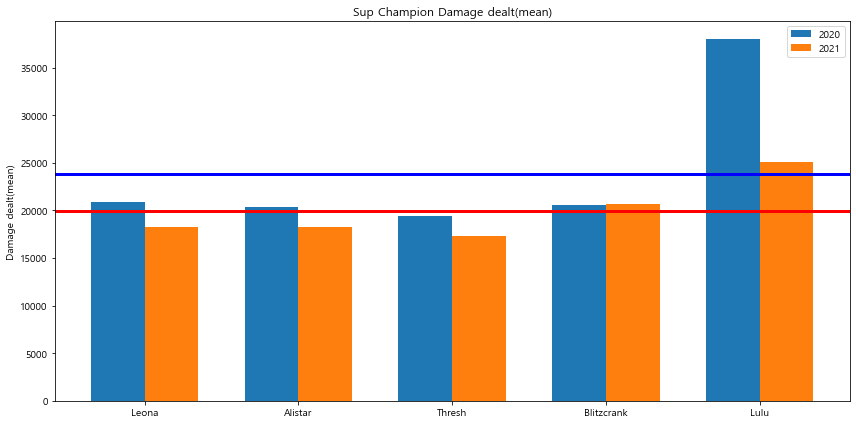

,2020,2021
Leona,20875.87,18272.70
Alistar,20394.93,18233.72
Thresh,19423.19,17291.09
Blitzcrank,20544.40,20680.52
Lulu,37967.52,25106.57


In [105]:
label=list(Sup_deal.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Sup_deal['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Sup_deal['2021'],width,label='2021')
ax.set_ylabel('Damage dealt(mean)')
ax.set_title('Sup Champion Damage dealt(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=Sup_deal['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=Sup_deal['2021'].mean(), color='r', linewidth=3)

plt.show()
Sup_deal

### Damage Taken

In [106]:
Leona_damage_20=champ_damage_20('Leona')
Alistar_damage_20=champ_damage_20('Alistar')
Thresh_damage_20=champ_damage_20('Thresh')
Blitzcrank_damage_20=champ_damage_20('Blitzcrank')
Lulu_damage_20=champ_damage_20('Lulu')

Leona_damage_21=champ_damage_21('Leona')
Alistar_damage_21=champ_damage_21('Alistar')
Thresh_damage_21=champ_damage_21('Thresh')
Blitzcrank_damage_21=champ_damage_21('Blitzcrank')
Lulu_damage_21=champ_damage_21('Lulu')

In [107]:
Sup_damage=pd.DataFrame({
    '2020':[round(Leona_damage_20.mean(),2),
           round(Alistar_damage_20.mean(),2),
           round(Thresh_damage_20.mean(),2),
           round(Blitzcrank_damage_20.mean(),2),
           round(Lulu_damage_20.mean(),2)],
    '2021':[round(Leona_damage_21.mean(),2),
           round(Alistar_damage_21.mean(),2),
           round(Thresh_damage_21.mean(),2),
           round(Blitzcrank_damage_21.mean(),2),
           round(Lulu_damage_21.mean(),2)]
},index=['Leona','Alistar','Thresh','Blitzcrank','Lulu'])

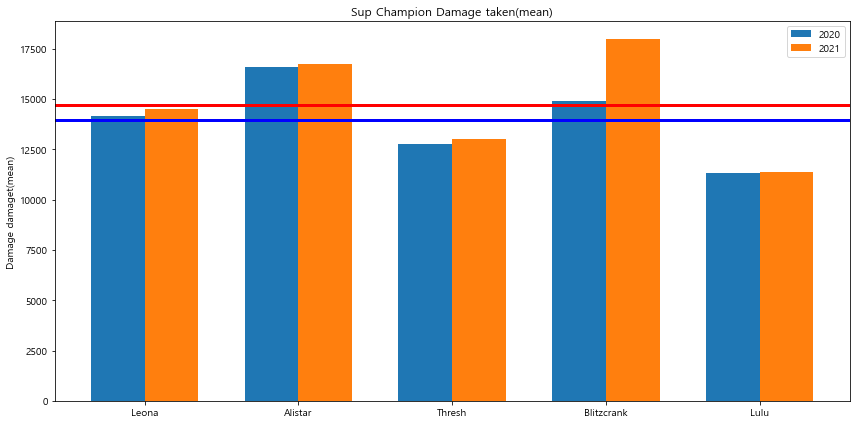

,2020,2021
Leona,14176.60,14514.73
Alistar,16591.40,16739.08
Thresh,12768.24,13032.96
Blitzcrank,14914.07,17960.26
Lulu,11309.85,11388.01


In [108]:
label=list(Sup_damage.index)
x=np.arange(len(label))
width=0.35
fig,ax=plt.subplots(figsize=(12,6))

rect1=ax.bar(x-width/2,Sup_damage['2020'],width,label='2020')
rect2=ax.bar(x+width/2,Sup_damage['2021'],width,label='2021')
ax.set_ylabel('Damage damaget(mean)')
ax.set_title('Sup Champion Damage taken(mean)')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()
plt.axhline(y=Sup_damage['2020'].mean(), color='b', linewidth=3)
plt.axhline(y=Sup_damage['2021'].mean(), color='r', linewidth=3)

plt.show()
Sup_damage

## AD Carry: Relation btw Damage Daelt & cs  

In [109]:
ad_list=['Draven','Lucian','MissFortune','Vayne','Aphelios','Sivir','Ashe',
         'Caitlyn','Corki','Ezreal','Jhin','Jinx','Kaisa','Kalista',
         'Kogmaw','Tristana','Twitch','Varus','Xayah','Quinn']
ad_cs_deal=pd.DataFrame(columns=['cs','deal'])
for i in ad_list:
    cs=cs_20(i)
    deal=champ_deal_20(i)
    ad_cs_deal=ad_cs_deal.append(pd.DataFrame({'cs':cs,'deal':deal}))
ad_cs_deal['index']=ad_cs_deal.index
ad_cs_deal.drop(['index'],1,inplace=True)
ad_cs_deal.reset_index(inplace=True,drop=True)
ad_cs_deal

,cs,deal
0,107,42459
1,284,239757
2,116,42154
3,138,72035
4,89,29662
...,...,...
49383,168,124389
49384,146,85234
49385,164,92780
49386,142,112474


In [110]:
c=pd.DataFrame(columns=['cs','deal'])
for i in range(len(ad_cs_deal)):
    if i%100 ==0:
        a=round(ad_cs_deal.iloc[i-100:i,:].mean(),0)
        c=c.append(pd.DataFrame({'cs':a[0],'deal':a[1]},index=[i])) 
    elif i == len(ad_cs_deal)-1:
        b=round(ad_cs_deal.iloc[(len(ad_cs_deal)-1)%100-1:i+1,:].mean(),0)
ad_cs_deal_per100=c.append(b,ignore_index=True)
ad_cs_deal_per100.dropna(inplace=True)
ad_cs_deal_per100.reset_index(inplace=True,drop=True)
ad_cs_deal_per100

,cs,deal
0,152.0,117269.0
1,150.0,110677.0
2,156.0,118046.0
3,168.0,125180.0
4,165.0,126989.0
...,...,...
489,147.0,109301.0
490,148.0,108929.0
491,145.0,103302.0
492,149.0,99857.0


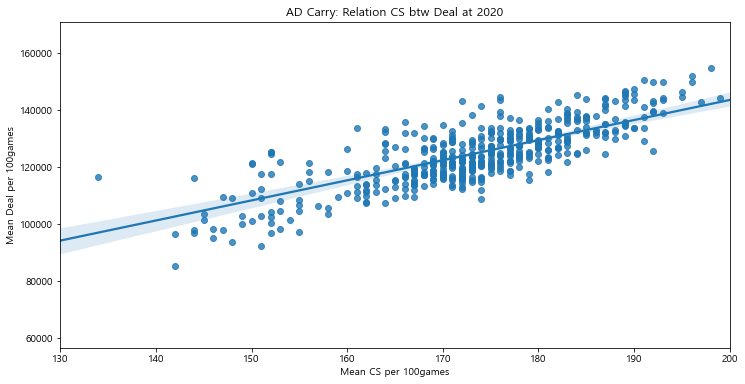

In [111]:
fig,ax=plt.subplots(figsize=(12,6))
sns.regplot(x = 'cs', y = 'deal', data = ad_cs_deal_per100)
ax.set_ylabel('Mean Deal per 100games')
ax.set_xlabel('Mean CS per 100games')
ax.set_xlim(130,200)
ax.set_title('AD Carry: Relation CS btw Deal at 2020')
plt.show()

In [112]:
ad_list=['Draven','Lucian','MissFortune','Vayne','Aphelios','Sivir','Ashe',
         'Caitlyn','Corki','Ezreal','Jhin','Jinx','Kaisa','Kalista',
         'Kogmaw','Tristana','Twitch','Varus','Xayah','Akshan','Samira','Quinn']
ad_cs_deal=pd.DataFrame(columns=['cs','deal'])
for i in ad_list:
    cs=cs_21(i)
    deal=champ_deal_21(i)
    ad_cs_deal=ad_cs_deal.append(pd.DataFrame({'cs':cs,'deal':deal}))
ad_cs_deal['index']=ad_cs_deal.index
ad_cs_deal.drop(['index'],1,inplace=True)
ad_cs_deal.reset_index(inplace=True,drop=True)
ad_cs_deal

,cs,deal
0,212,136286
1,220,172927
2,128,63340
3,192,117839
4,188,103745
...,...,...
22811,19,40849
22812,40,46448
22813,204,155294
22814,120,125517


In [113]:
c=pd.DataFrame(columns=['cs','deal'])
for i in range(len(ad_cs_deal)):
    if i%100 ==0:
        a=round(ad_cs_deal.iloc[i-100:i,:].mean(),0)
        c=c.append(pd.DataFrame({'cs':a[0],'deal':a[1]},index=[i])) 
    elif i == len(ad_cs_deal)-1:
        b=round(ad_cs_deal.iloc[(len(ad_cs_deal)-1)%100-1:i+1,:].mean(),0)
ad_cs_deal_per100=c.append(b,ignore_index=True)
ad_cs_deal_per100.dropna(inplace=True)
ad_cs_deal_per100.reset_index(inplace=True,drop=True)
ad_cs_deal_per100

,cs,deal
0,169.0,122676.0
1,161.0,118811.0
2,171.0,124999.0
3,158.0,112392.0
4,166.0,119902.0
...,...,...
224,154.0,107413.0
225,154.0,114249.0
226,155.0,110555.0
227,156.0,113780.0


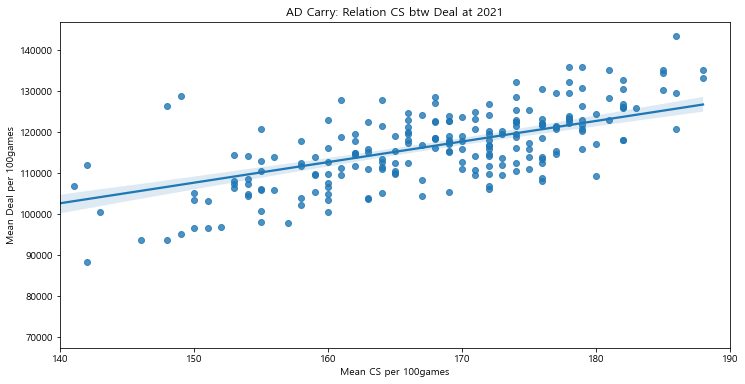

In [114]:
fig,ax=plt.subplots(figsize=(12,6))
sns.regplot(x = 'cs', y = 'deal', data = ad_cs_deal_per100)
ax.set_ylabel('Mean Deal per 100games')
ax.set_xlabel('Mean CS per 100games')
ax.set_xlim(140,190)
ax.set_title('AD Carry: Relation CS btw Deal at 2021')
plt.show()

## Support: Vision Score & WinRate

In [115]:
sup_list=['Alistar','Bard','Blitzcrank','Brand','Braum','Leona','Lulu','Lux','Morgana',
         'Nami','Nautilus','Pantheon','Pyke','Rakan','Senna','Sett','Shen','Sona','Swain',
         'TahmKench','Taric','Thresh','Velkoz','Xerath','Yummi','Zilean','Zyra','Janna','Karma','Soraka']
sup_list_2=['Alistar','Bard','Blitzcrank','Brand','Braum','Leona','Lulu','Lux','Morgana',
         'Nami','Nautilus','Pantheon','Pyke','Rakan','Senna','Sett','Shen','Sona','Swain',
         'TahmKench','Taric','Thresh','Velkoz','Xerath','Yummi','Zilean','Zyra','Janna','Rell','Karma','Soraka','Seraphine']
sup_vision=pd.DataFrame(columns=['winrate','visionscore'])
sup_vision_2=pd.DataFrame(columns=['winrate','visionscore'])

In [116]:
for i in sup_list:
    a=win_vision_per100_20(i)
    sup_vision=sup_vision.append(a,ignore_index=True)
sup_vision

,winrate,visionscore
0,0.55,46.16
1,0.58,47.18
2,0.54,44.72
3,0.46,47.60
4,0.52,45.54
...,...,...
639,0.49,27.98
640,0.52,29.92
641,0.46,31.98
642,0.39,33.31


In [117]:
for i in sup_list_2:
    a=win_vision_per100_21(i)
    sup_vision_2=sup_vision_2.append(a,ignore_index=True)
sup_vision_2

,winrate,visionscore
0,0.47,43.90
1,0.49,45.88
2,0.53,44.69
3,0.56,46.91
4,0.54,39.13
...,...,...
281,0.48,44.50
282,0.48,29.23
283,0.50,33.56
284,0.56,29.23


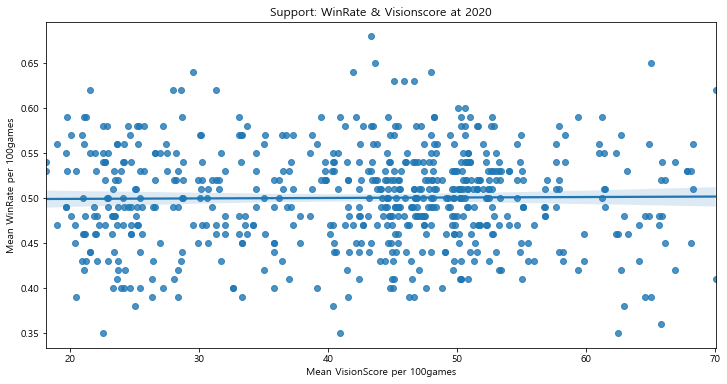

In [118]:
fig,ax=plt.subplots(figsize=(12,6))
sns.regplot(x = 'visionscore', y = 'winrate', data = sup_vision)
ax.set_ylabel('Mean WinRate per 100games')
ax.set_xlabel('Mean VisionScore per 100games')
#ax.set_xlim(140,190)
ax.set_title('Support: WinRate & Visionscore at 2020')
plt.show()

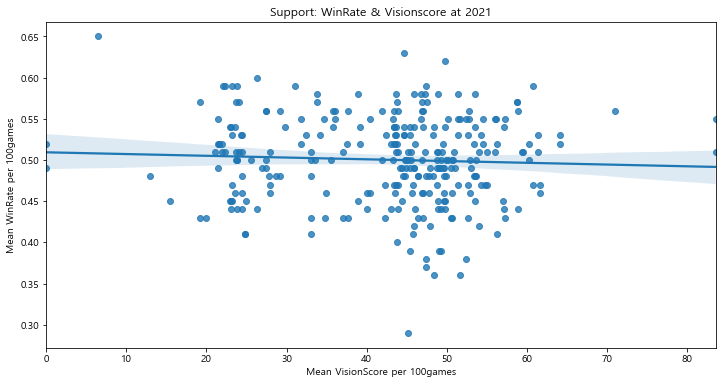

In [119]:
fig,ax=plt.subplots(figsize=(12,6))
sns.regplot(x = 'visionscore', y = 'winrate', data = sup_vision_2)
ax.set_ylabel('Mean WinRate per 100games')
ax.set_xlabel('Mean VisionScore per 100games')
#ax.set_xlim(140,190)
ax.set_title('Support: WinRate & Visionscore at 2021')
plt.show()

## Jungle Winrate change

In [120]:
jungel_list_2020=['Amumu','Diana','Ekko','Elise','Evelynn','Fiddlestick','Gragas','Graves',
                 'Hecarim','Ivern','JarvanIV','Jax','Karthus','Kayn','Khazix','Kindred','LeeSin','MasterYi',
                 'Nidalee','Nocturne','Nunu','Olaf','Rammus','RekSai','Rengar','Sejuani','Shaco','Shyvana',
                 'Taliyah','Udyr','Vi','Warwick','XinZhao','Zac']
jungel_list_2021=['Amumu','Diana','Ekko','Elise','Evelynn','Fiddlestick','Gragas','Graves',
                 'Hecarim','Ivern','JarvanIV','Jax','Karthus','Kayn','Khazix','Kindred','LeeSin','MasterYi',
                 'Nidalee','Nocturne','Nunu','Olaf','Rammus','RekSai','Rengar','Sejuani','Shaco','Shyvana',
                 'Taliyah','Udyr','Vi','Warwick','XinZhao','Zac','Gwen',
                 'Viego','Lillia']

jungle_winrate_2020=pd.DataFrame(columns=['winrate'])
jungle_winrate_2021=pd.DataFrame(columns=['winrate'])

In [121]:
for i in jungel_list_2020:
    a=win_per100_2020(i)
    jungle_winrate_2020=jungle_winrate_2020.append(a)
jungle_winrate_2020.sort_index(inplace=True)
jungle_winrate_2020

,winrate
254.0,0.51
277.0,0.58
372.0,0.52
450.0,0.56
465.0,0.45
...,...
25703.0,0.54
25703.0,0.46
25704.0,0.48
25704.0,0.47


In [122]:
for i in jungel_list_2021:
    a=win_per100_2021_r(i)
    jungle_winrate_2021=jungle_winrate_2021.append(a)
jungle_winrate_2021.sort_index(inplace=True)
jungle_winrate_2021

,winrate
211.0,0.39
230.0,0.41
422.0,0.47
444.0,0.46
494.0,0.44
...,...
11716.0,0.53
11718.0,0.47
11718.0,0.53
11719.0,0.59


In [123]:
jungle_winrate_2020['winrate']=jungle_winrate_2020['winrate']*100
jungle_winrate_2021['winrate']=jungle_winrate_2021['winrate']*100

In [124]:
jungle_winrate_2021.reset_index(inplace=True)
jungle_winrate_2021['index']=jungle_winrate_2021['index']+25704
jungle_winrate_2021.rename(columns={'index':''},inplace=True)
jungle_winrate_2021.set_index('',drop=True,inplace=True)
jungle_winrate_2021

,winrate
,
25915.0,39.0
25934.0,41.0
26126.0,47.0
26148.0,46.0
26198.0,44.0
...,...
37420.0,53.0
37422.0,47.0
37422.0,53.0


In [125]:
jungle_winrate=pd.concat([jungle_winrate_2020,jungle_winrate_2021])
jungle_winrate.reset_index(drop=True,inplace=True)

In [126]:
df=pd.DataFrame(columns=['winrate'])
for i in range(len(jungle_winrate)):
    if i%10==0:
        winrate=round(jungle_winrate.iloc[i-10:i,0].mean(),0)
        df=df.append(pd.DataFrame({'winrate':winrate},index=[i]),ignore_index=True)
    elif i == len(jungle_winrate)-1:
        winrate_rest=round(jungle_winrate.iloc[(len(jungle_winrate)-(len(jungle_winrate)-1))%10:,0].mean(),0)
        df=df.append(pd.DataFrame({'winrate':winrate_rest},index=[i]),ignore_index=True)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,winrate
0,52.0
1,50.0
2,47.0
3,51.0
4,50.0
...,...
72,48.0
73,46.0
74,53.0
75,52.0


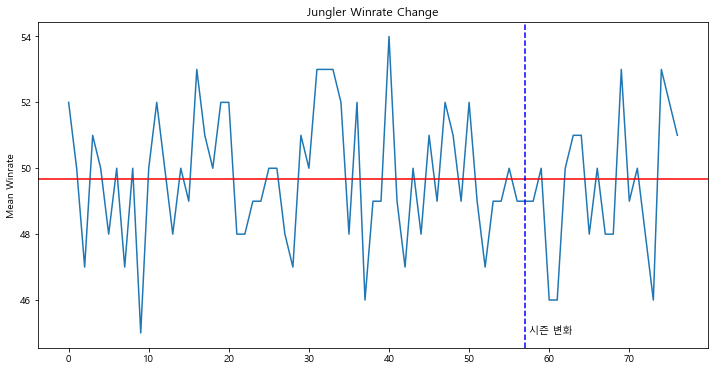

In [127]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['winrate'])
plt.ylabel('Mean Winrate')
plt.title('Jungler Winrate Change')
plt.axhline(y=df['winrate'].mean(),color='r')
plt.axvline(57,color='b',linestyle='--')
plt.text(57.5,45,'시즌 변화',fontsize=10)
plt.show()

## Volibear

### 승리한 게임에서의 같은 팀 챔피언

In [128]:
Bear_blue_win_20=champ_bluewin_20('Volibear')
Bear_blue_win_21=champ_bluewin_21('Volibear')
Bear_red_win_20=champ_redwin_20('Volibear')
Bear_red_win_21=champ_redwin_21('Volibear')

In [129]:
champlist_b_20=[]
for i in range(len(Bear_blue_win_20)):
    win_b_comb=list(Bear_blue_win_20[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ']].iloc[i,:])
    win_b_comb.remove('Volibear')
    champlist_b_20.append(win_b_comb)
champlist_b_20
champ_comb_b_20=sum(champlist_b_20,[])
champ_comb_b_20

['Bard',
 'Kaisa',
 'Neeko',
 'LeeSin',
 'Taliyah',
 'Pantheon',
 'Kalista',
 'Hecarim',
 'Fiora',
 'Sylas',
 'Pantheon',
 'Senna',
 'LeeSin',
 'Kalista',
 'Darius',
 'Leblanc',
 'Olaf',
 'Zoe',
 'Kayle',
 'Kaisa',
 'MonkeyKing',
 'RekSai',
 'Leblanc',
 'Kaisa',
 'Graves',
 'Rumble',
 'Varus',
 'Karma',
 'LeeSin',
 'Neeko',
 'Sett',
 'Nocturne',
 'Aatrox',
 'Taliyah',
 'Talon',
 'MissFortune',
 'Irelia',
 'Syndra',
 'Elise',
 'Sett',
 'LeeSin',
 'Aphelios',
 'Fizz',
 'Aatrox',
 'MonkeyKing',
 'Varus',
 'Nidalee',
 'Talon',
 'Varus',
 'Fiora',
 'LeeSin',
 'TwistedFate',
 'Aphelios',
 'Sylas',
 'Talon',
 'Taric',
 'Yasuo',
 'Zac',
 'Zilean',
 'Sett',
 'Sett',
 'Senna',
 'Sejuani',
 'Sylas',
 'Yasuo',
 'Rumble',
 'Kennen',
 'Camille',
 'Olaf',
 'Ornn',
 'Mordekaiser',
 'Kaisa',
 'LeeSin',
 'Syndra',
 'Poppy',
 'Zac',
 'LeeSin',
 'Senna',
 'Rumble',
 'Cassiopeia',
 'MissFortune',
 'Zed',
 'Gragas',
 'Shen',
 'Olaf',
 'Ekko',
 'MissFortune',
 'Blitzcrank',
 'Zac',
 'Jhin',
 'Heimerdinger',


In [130]:
champlist_r_20=[]
for i in range(len(Bear_red_win_20)):
    win_r_comb=list(Bear_red_win_20[['red_1_champ','red_2_champ','red_3_champ','red_4_champ','red_5_champ']].iloc[i,:])
    win_r_comb.remove('Volibear')
    champlist_r_20.append(win_r_comb)
champlist_r_20
champ_comb_r_20=sum(champlist_r_20,[])
champ_comb_r_20

['Darius',
 'Olaf',
 'Zoe',
 'Aphelios',
 'Diana',
 'Renekton',
 'Trundle',
 'Kaisa',
 'Azir',
 'Renekton',
 'Elise',
 'Varus',
 'Nidalee',
 'Renekton',
 'Kalista',
 'Rumble',
 'Kaisa',
 'Aatrox',
 'Gragas',
 'Pantheon',
 'Ahri',
 'Kalista',
 'Olaf',
 'Sylas',
 'Soraka',
 'Zoe',
 'LeeSin',
 'Kalista',
 'Talon',
 'Poppy',
 'Akali',
 'Lucian',
 'MissFortune',
 'Sylas',
 'Zoe',
 'Senna',
 'Ezreal',
 'Renekton',
 'Olaf',
 'Leblanc',
 'Blitzcrank',
 'Garen',
 'Ezreal',
 'Veigar',
 'Ekko',
 'Kalista',
 'Garen',
 'Nocturne',
 'Sett',
 'Kaisa',
 'Ekko',
 'Talon',
 'LeeSin',
 'Kassadin',
 'Cassiopeia',
 'Jayce',
 'Renekton',
 'Ekko',
 'Irelia',
 'Senna',
 'Mordekaiser',
 'Aphelios',
 'Graves',
 'Zoe',
 'Senna',
 'Taliyah',
 'Graves',
 'Chogath',
 'Elise',
 'Syndra',
 'Sett',
 'Tristana',
 'Kalista',
 'Zoe',
 'LeeSin',
 'Shen',
 'Shen',
 'Aphelios',
 'Shyvana',
 'Pyke',
 'MonkeyKing',
 'Kayn',
 'MissFortune',
 'Blitzcrank',
 'Elise',
 'Zoe',
 'Lucian',
 'Senna',
 'Tristana',
 'Aatrox',
 'Ekko',


In [131]:
champ_comb_20=champ_comb_b_20+champ_comb_r_20
champ_comb_20

['Bard',
 'Kaisa',
 'Neeko',
 'LeeSin',
 'Taliyah',
 'Pantheon',
 'Kalista',
 'Hecarim',
 'Fiora',
 'Sylas',
 'Pantheon',
 'Senna',
 'LeeSin',
 'Kalista',
 'Darius',
 'Leblanc',
 'Olaf',
 'Zoe',
 'Kayle',
 'Kaisa',
 'MonkeyKing',
 'RekSai',
 'Leblanc',
 'Kaisa',
 'Graves',
 'Rumble',
 'Varus',
 'Karma',
 'LeeSin',
 'Neeko',
 'Sett',
 'Nocturne',
 'Aatrox',
 'Taliyah',
 'Talon',
 'MissFortune',
 'Irelia',
 'Syndra',
 'Elise',
 'Sett',
 'LeeSin',
 'Aphelios',
 'Fizz',
 'Aatrox',
 'MonkeyKing',
 'Varus',
 'Nidalee',
 'Talon',
 'Varus',
 'Fiora',
 'LeeSin',
 'TwistedFate',
 'Aphelios',
 'Sylas',
 'Talon',
 'Taric',
 'Yasuo',
 'Zac',
 'Zilean',
 'Sett',
 'Sett',
 'Senna',
 'Sejuani',
 'Sylas',
 'Yasuo',
 'Rumble',
 'Kennen',
 'Camille',
 'Olaf',
 'Ornn',
 'Mordekaiser',
 'Kaisa',
 'LeeSin',
 'Syndra',
 'Poppy',
 'Zac',
 'LeeSin',
 'Senna',
 'Rumble',
 'Cassiopeia',
 'MissFortune',
 'Zed',
 'Gragas',
 'Shen',
 'Olaf',
 'Ekko',
 'MissFortune',
 'Blitzcrank',
 'Zac',
 'Jhin',
 'Heimerdinger',


In [132]:
Bear_win_comb_20=pd.DataFrame(champ_comb_20,columns=['champ'])
Bear_win_comb_20['count']=1
Bear_win_comb_20=Bear_win_comb_20.groupby('champ').count()
Bear_win_comb_20=Bear_win_comb_20.sort_values('count',ascending=False).head(20)
Bear_win_comb_20

,count
champ,
Kaisa,69
LeeSin,68
Senna,67
MissFortune,57
Ekko,54
Sylas,53
Lucian,50
Sett,47
Aphelios,47


In [133]:
champlist_b_21=[]
for i in range(len(Bear_blue_win_21)):
    win_b_comb=list(Bear_blue_win_21[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ']].iloc[i,:])
    win_b_comb.remove('Volibear')
    champlist_b_21.append(win_b_comb)
champlist_b_21
champ_comb_b_21=sum(champlist_b_21,[])
champ_comb_b_21

['Lulu',
 'Aphelios',
 'Gwen',
 'Thresh',
 'Camille',
 'Leblanc',
 'Draven',
 'Leona',
 'Karma',
 'Renekton',
 'Nidalee',
 'Varus',
 'Leblanc',
 'Ezreal',
 'Gwen',
 'Karma',
 'Ezreal',
 'Kayle',
 'Karma',
 'Camille',
 'Ezreal',
 'Akali',
 'Gwen',
 'Karma',
 'Yuumi',
 'Sylas',
 'DrMundo',
 'Aphelios',
 'Kaisa',
 'Leona',
 'Aatrox',
 'Leblanc',
 'MonkeyKing',
 'Ziggs',
 'Lucian',
 'Thresh',
 'Leblanc',
 'Gwen',
 'Sett',
 'Senna',
 'Aphelios',
 'Thresh',
 'Syndra',
 'Fiora',
 'Sylas',
 'Irelia',
 'Rakan',
 'Ziggs',
 'Shen',
 'Nocturne',
 'Jhin',
 'Sylas',
 'Ezreal',
 'LeeSin',
 'Rumble',
 'Senna',
 'Varus',
 'Nocturne',
 'Thresh',
 'Akali',
 'Kayn',
 'Kaisa',
 'Galio',
 'Akali',
 'Fiora',
 'Varus',
 'Alistar',
 'Akali',
 'Ryze',
 'Aphelios',
 'Fiora',
 'TahmKench',
 'Jayce',
 'Aphelios',
 'Rumble',
 'Nautilus',
 'Ryze',
 'Thresh',
 'Kalista',
 'Lucian',
 'Leona',
 'LeeSin',
 'Jhin',
 'Orianna',
 'Jinx',
 'Thresh',
 'Ryze',
 'Akali',
 'Braum',
 'LeeSin',
 'Ezreal',
 'Kennen',
 'Viego',
 'E

In [134]:
champlist_r_21=[]
for i in range(len(Bear_red_win_21)):
    win_r_comb=list(Bear_red_win_21[['red_1_champ','red_2_champ','red_3_champ','red_4_champ','red_5_champ']].iloc[i,:])
    win_r_comb.remove('Volibear')
    champlist_r_21.append(win_r_comb)
champlist_r_21
champ_comb_r_21=sum(champlist_r_21,[])
champ_comb_r_21

['Zoe',
 'Aphelios',
 'Thresh',
 'Gwen',
 'Katarina',
 'Hecarim',
 'Karma',
 'Varus',
 'Ezreal',
 'DrMundo',
 'Viktor',
 'TahmKench',
 'Leblanc',
 'XinZhao',
 'Gragas',
 'Samira',
 'Lucian',
 'Alistar',
 'Ziggs',
 'LeeSin',
 'Zoe',
 'Jinx',
 'Lulu',
 'Akali',
 'LeeSin',
 'Pyke',
 'Ziggs',
 'Viego',
 'Leblanc',
 'Akali',
 'Lulu',
 'KogMaw',
 'Sylas',
 'Karma',
 'Sett',
 'Ezreal',
 'Sett',
 'Nidalee',
 'Karma',
 'Jinx',
 'Sylas',
 'Aphelios',
 'Thresh',
 'Irelia',
 'Vayne',
 'XinZhao',
 'Zoe',
 'Rakan',
 'LeeSin',
 'Sylas',
 'Lux',
 'Senna',
 'Irelia',
 'Kalista',
 'Alistar',
 'Gragas',
 'Jayce',
 'Alistar',
 'Kassadin',
 'Kalista',
 'LeeSin',
 'Camille',
 'Aphelios',
 'Galio',
 'TahmKench',
 'Jayce',
 'Aphelios',
 'Ryze',
 'LeeSin',
 'TahmKench',
 'Viktor',
 'Aphelios',
 'Shen',
 'Senna',
 'Sylas',
 'Irelia',
 'Sylas',
 'Varus',
 'Sett',
 'Thresh',
 'Braum',
 'Lulu',
 'Ezreal',
 'Sett',
 'Lucian',
 'Ziggs',
 'Jax',
 'Leona',
 'LeeSin',
 'Irelia',
 'Aphelios',
 'TahmKench',
 'Nautilus',


In [135]:
champ_comb_21=champ_comb_b_21+champ_comb_r_21
champ_comb_21

['Lulu',
 'Aphelios',
 'Gwen',
 'Thresh',
 'Camille',
 'Leblanc',
 'Draven',
 'Leona',
 'Karma',
 'Renekton',
 'Nidalee',
 'Varus',
 'Leblanc',
 'Ezreal',
 'Gwen',
 'Karma',
 'Ezreal',
 'Kayle',
 'Karma',
 'Camille',
 'Ezreal',
 'Akali',
 'Gwen',
 'Karma',
 'Yuumi',
 'Sylas',
 'DrMundo',
 'Aphelios',
 'Kaisa',
 'Leona',
 'Aatrox',
 'Leblanc',
 'MonkeyKing',
 'Ziggs',
 'Lucian',
 'Thresh',
 'Leblanc',
 'Gwen',
 'Sett',
 'Senna',
 'Aphelios',
 'Thresh',
 'Syndra',
 'Fiora',
 'Sylas',
 'Irelia',
 'Rakan',
 'Ziggs',
 'Shen',
 'Nocturne',
 'Jhin',
 'Sylas',
 'Ezreal',
 'LeeSin',
 'Rumble',
 'Senna',
 'Varus',
 'Nocturne',
 'Thresh',
 'Akali',
 'Kayn',
 'Kaisa',
 'Galio',
 'Akali',
 'Fiora',
 'Varus',
 'Alistar',
 'Akali',
 'Ryze',
 'Aphelios',
 'Fiora',
 'TahmKench',
 'Jayce',
 'Aphelios',
 'Rumble',
 'Nautilus',
 'Ryze',
 'Thresh',
 'Kalista',
 'Lucian',
 'Leona',
 'LeeSin',
 'Jhin',
 'Orianna',
 'Jinx',
 'Thresh',
 'Ryze',
 'Akali',
 'Braum',
 'LeeSin',
 'Ezreal',
 'Kennen',
 'Viego',
 'E

In [136]:
Bear_win_comb_21=pd.DataFrame(champ_comb_21,columns=['champ'])
Bear_win_comb_21['count']=1
Bear_win_comb_21=Bear_win_comb_21.groupby('champ').count()
Bear_win_comb_21=Bear_win_comb_21.sort_values('count',ascending=False).head(20)
Bear_win_comb_21

,count
champ,
Ezreal,71
Sylas,69
Aphelios,65
Thresh,60
LeeSin,55
Karma,51
Viego,49
Leona,47
Akali,43


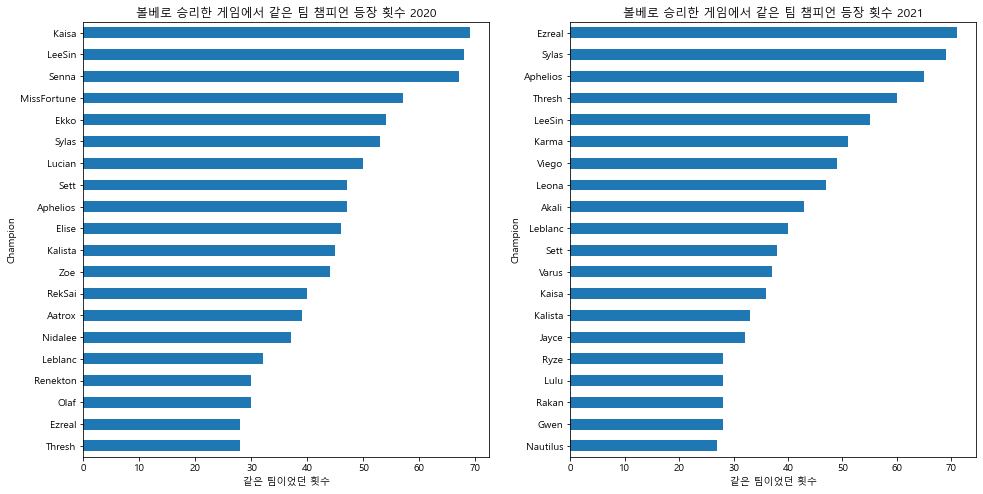

In [137]:
f,ax=plt.subplots(1,2,figsize=(16,8))

Bear_win_comb_20['count'].plot.barh(ax=ax[0]).invert_yaxis()
ax[0].set_title('볼베로 승리한 게임에서 같은 팀 챔피언 등장 횟수 2020')
ax[0].set_xlabel('같은 팀이었던 횟수')
ax[0].set_ylabel('Champion')

Bear_win_comb_21['count'].plot.barh(ax=ax[1]).invert_yaxis()
ax[1].set_title('볼베로 승리한 게임에서 같은 팀 챔피언 등장 횟수 2021')
ax[1].set_xlabel('같은 팀이었던 횟수')
ax[1].set_ylabel('Champion')

plt.show()

### 딜량 변화

In [138]:
Bear_deal_20=pd.DataFrame(data=champ_deal_20('Volibear'),columns=['deal'])
Bear_deal_21=pd.DataFrame(data=champ_deal_21('Volibear'),columns=['deal'])

In [139]:
d=pd.DataFrame(columns=['deal'])
for i in range(len(Bear_deal_20)):
    if i% 100 ==0:
        deal_tmp=round(Bear_deal_20.iloc[i-100:i,0].mean(),0)
        d=d.append(pd.DataFrame({'deal':deal_tmp},index=[i]))
    elif i ==len(Bear_deal_20)-1:
        tmp_deal=round(Bear_deal_20.iloc[(len(Bear_deal_20)-1)%100-1:i+1,0].mean(),0)
        tmp_deal_df=pd.DataFrame({'deal':tmp_deal},index=[i])

idx=[]
for i in range(len(Bear_deal_20)):
    if i %100 ==0:
        idx_tmp=list(Bear_deal_20.iloc[i-100:i,0].index)
        idx.append(idx_tmp)
    elif i == len(Bear_deal_20)-1:
        tmp_idx=list(Bear_deal_20.index)[len(Bear_deal_20)-1]
        idx.append(tmp_idx)
idx_list=[]
for x in range(len(idx)):
    idx_list_tmp=round(np.mean(idx[x]),0)
    idx_list.append(idx_list_tmp)

deal_bear_20=pd.concat([d,tmp_deal_df])
deal_bear_20['']=idx_list

In [140]:
deal_bear_20.dropna(inplace=True)
deal_bear_20.set_index('',drop=True,inplace=True)
deal_bear_20.sort_index(inplace=True)
deal_bear_20

,deal
,
9274.0,49452.0
9994.0,51576.0
10536.0,46130.0
11011.0,48942.0
11513.0,60034.0
11737.0,53302.0
11774.0,46796.0
12483.0,53262.0
25334.0,51701.0


In [141]:
d=pd.DataFrame(columns=['deal'])
for i in range(len(Bear_deal_21)):
    if i% 100 ==0:
        deal_tmp=round(Bear_deal_21.iloc[i-100:i,0].mean(),0)
        d=d.append(pd.DataFrame({'deal':deal_tmp},index=[i]))
    elif i ==len(Bear_deal_21)-1:
        tmp_deal=round(Bear_deal_21.iloc[(len(Bear_deal_21)-1)%100-1:i+1,0].mean(),0)
        tmp_deal_df=pd.DataFrame({'deal':tmp_deal},index=[i])

idx=[]
for i in range(len(Bear_deal_21)):
    if i %100 ==0:
        idx_tmp=list(Bear_deal_21.iloc[i-100:i,0].index)
        idx.append(idx_tmp)
    elif i == len(Bear_deal_21)-1:
        tmp_idx=list(Bear_deal_21.index)[len(Bear_deal_21)-1]
        idx.append(tmp_idx)
idx_list=[]
for x in range(len(idx)):
    idx_list_tmp=round(np.mean(idx[x]),0)
    idx_list.append(idx_list_tmp)

deal_bear_21=pd.concat([d,tmp_deal_df])
deal_bear_21['']=idx_list
deal_bear_21.dropna(inplace=True)
deal_bear_21

,deal,
100,100846.0,4251.0
200,107854.0,4901.0
300,106578.0,5387.0
400,98589.0,5225.0
500,103653.0,5775.0
600,109646.0,4398.0
700,104066.0,4478.0
800,107125.0,5230.0
848,105143.0,11395.0


In [142]:
deal_bear_21['']=deal_bear_21['']+25334.0
deal_bear_21.set_index('',drop=True,inplace=True)
deal_bear_21.sort_index(inplace=True)
deal_bear_21

,deal
,
29585.0,100846.0
29732.0,109646.0
29812.0,104066.0
30235.0,107854.0
30559.0,98589.0
30564.0,107125.0
30721.0,106578.0
31109.0,103653.0
36729.0,105143.0


In [143]:
deal_bear=pd.concat([deal_bear_20,deal_bear_21]).sort_index()
deal_bear.reset_index(drop=True,inplace=True)
deal_bear

,deal
0,49452.0
1,51576.0
2,46130.0
3,48942.0
4,60034.0
5,53302.0
6,46796.0
7,53262.0
8,51701.0
9,100846.0


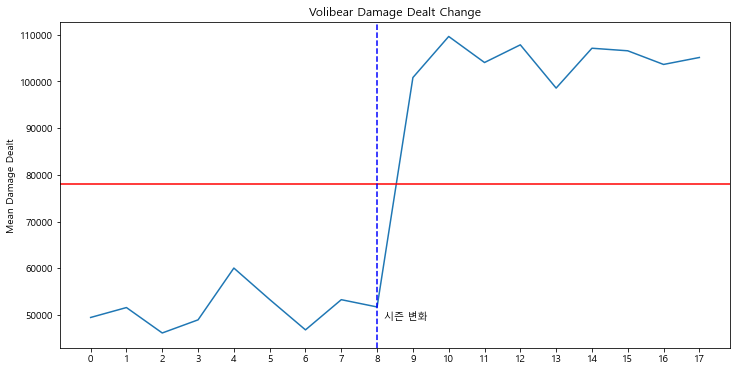

In [144]:
plt.figure(figsize=(12,6))
plt.plot(deal_bear.index,deal_bear['deal'])
plt.ylabel('Mean Damage Dealt')
plt.xticks(deal_bear.index)
plt.title('Volibear Damage Dealt Change')
plt.axhline(y=deal_bear['deal'].mean(),color='r')
plt.axvline(8,color='b',linestyle='--')
plt.text(8.2,49000,'시즌 변화',fontsize=10)
plt.show()

### 활약했을 때의 같은 팀 조합, 활약을 못했을 때의 상대팀 조합

In [145]:
k1=kda_20('Volibear')
d1=champ_deal_20('Volibear')
Bear_performance_20=pd.DataFrame({'kda':k1,'deal':d1})
time=pd.DataFrame(columns=['play_time'])
for i in list(Bear_performance_20.index):
    a=match_20['play_time'].loc[i]
    time=time.append(pd.DataFrame({'play_time':a},index=[i]),ignore_index=False)
Bear_performance_20['play_time']=time
Bear_performance_20.drop(Bear_performance_20[Bear_performance_20['play_time']<1200].index,inplace=True)
Bear_performance_20.drop(Bear_performance_20[Bear_performance_20['deal']<10000].index,inplace=True)
Bear_performance_20.sort_values(by=['kda','deal'],ascending=True,inplace=True)
Bear_performance_20

,kda,deal,play_time
1459,0.142857,45666,1420
20368,0.200000,51425,1301
9834,0.250000,17430,1320
8764,0.250000,72183,1308
6690,0.333333,19419,1537
...,...,...,...
3298,25.000000,141677,1944
9102,25.200000,30046,1424
13058,25.200000,144476,1769
17668,27.000000,30415,1519


In [146]:
Bear_bad_perform_20=Bear_performance_20.head(10)
Bear_good_perform_20=Bear_performance_20.tail(10)

In [147]:
bad_perform_20=pd.DataFrame(columns=['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ','red_1_champ',
                    'red_2_champ','red_3_champ','red_4_champ','red_5_champ'])
for i in list(Bear_bad_perform_20.index):
    a=match_20[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ','red_1_champ',
                    'red_2_champ','red_3_champ','red_4_champ','red_5_champ']].loc[i]
    bad_perform_20=bad_perform_20.append(a)

bad_perform_20_b=bad_perform_20[(bad_perform_20['blue_1_champ']=='Volibear')|(bad_perform_20['blue_2_champ']=='Volibear')|\
                               (bad_perform_20['blue_3_champ']=='Volibear')|(bad_perform_20['blue_4_champ']=='Volibear')|\
                               (bad_perform_20['blue_5_champ']=='Volibear')]
bad_perform_20_tmp_b=bad_perform_20_b[['red_1_champ','red_2_champ','red_3_champ','red_4_champ','red_5_champ']]
bad_perform_20_tmp_b.rename(columns={'red_1_champ':'champ_1','red_2_champ':'champ_2','red_3_champ':'champ_3',
                                     'red_4_champ':'champ_4','red_5_champ':'champ_5'},inplace=True)

bad_perform_20_r=bad_perform_20[(bad_perform_20['red_1_champ']=='Volibear')|(bad_perform_20['red_2_champ']=='Volibear')|\
                               (bad_perform_20['red_3_champ']=='Volibear')|(bad_perform_20['red_4_champ']=='Volibear')|\
                               (bad_perform_20['red_5_champ']=='Volibear')]
bad_perform_20_tmp_r=bad_perform_20_r[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ']]
bad_perform_20_tmp_r.rename(columns={'blue_1_champ':'champ_1','blue_2_champ':'champ_2','blue_3_champ':'champ_3',
                                     'blue_4_champ':'champ_4','blue_5_champ':'champ_5'},inplace=True)

bad_perform_20_comb=pd.concat([bad_perform_20_tmp_b,bad_perform_20_tmp_r])
bad_perform_20_comb.sort_index(inplace=True)
bad_perform_20_comb

,champ_1,champ_2,champ_3,champ_4,champ_5
1459,Leona,Graves,Jayce,Zoe,Syndra
2788,Qiyana,XinZhao,Vladimir,Mordekaiser,Yuumi
6690,Shen,Syndra,Orianna,JarvanIV,Jayce
8764,Nidalee,Tryndamere,Zoe,Ezreal,Thresh
9834,Trundle,Leblanc,Ornn,Lucian,Yuumi
11995,Ezreal,Bard,Karthus,Lucian,Shen
14210,Sylas,Shen,Lucian,Ezreal,Yuumi
18147,Olaf,Bard,Taliyah,Aphelios,Akali
20368,Aphelios,Taliyah,Renekton,Sylas,Nautilus
21085,Ezreal,Bard,Irelia,Nidalee,Mordekaiser


In [148]:
good_perform_20=pd.DataFrame(columns=['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ','red_1_champ',
                    'red_2_champ','red_3_champ','red_4_champ','red_5_champ'])
for i in list(Bear_good_perform_20.index):
    a=match_20[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ','red_1_champ',
                    'red_2_champ','red_3_champ','red_4_champ','red_5_champ']].loc[i]
    good_perform_20=good_perform_20.append(a)

good_perform_20_b=good_perform_20[(good_perform_20['blue_1_champ']=='Volibear')|(good_perform_20['blue_2_champ']=='Volibear')|\
                               (good_perform_20['blue_3_champ']=='Volibear')|(good_perform_20['blue_4_champ']=='Volibear')|\
                               (good_perform_20['blue_5_champ']=='Volibear')]
good_perform_20_tmp_b=good_perform_20_b[['red_1_champ','red_2_champ','red_3_champ','red_4_champ','red_5_champ']]
good_perform_20_tmp_b.rename(columns={'red_1_champ':'champ_1','red_2_champ':'champ_2','red_3_champ':'champ_3',
                                     'red_4_champ':'champ_4','red_5_champ':'champ_5'},inplace=True)

good_perform_20_r=good_perform_20[(good_perform_20['red_1_champ']=='Volibear')|(good_perform_20['red_2_champ']=='Volibear')|\
                               (good_perform_20['red_3_champ']=='Volibear')|(good_perform_20['red_4_champ']=='Volibear')|\
                               (good_perform_20['red_5_champ']=='Volibear')]
good_perform_20_tmp_r=good_perform_20_r[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ']]
good_perform_20_tmp_r.rename(columns={'blue_1_champ':'champ_1','blue_2_champ':'champ_2','blue_3_champ':'champ_3',
                                     'blue_4_champ':'champ_4','blue_5_champ':'champ_5'},inplace=True)

good_perform_20_comb=pd.concat([good_perform_20_tmp_b,good_perform_20_tmp_r])
good_perform_20_comb.sort_index(inplace=True)
good_perform_20_comb

,champ_1,champ_2,champ_3,champ_4,champ_5
3298,Sylas,Ezreal,Yuumi,Sett,Irelia
4114,Aphelios,Taric,Tryndamere,LeeSin,Diana
5749,Lucian,Ekko,Aphelios,Thresh,Irelia
6502,Elise,Rengar,Diana,TahmKench,Senna
8737,Yuumi,Aatrox,Aphelios,Elise,Jayce
8921,Xayah,Ryze,Lucian,Rengar,Rakan
9102,Pantheon,Bard,Aphelios,Ekko,Jax
11626,Lulu,Mordekaiser,Nunu,Zed,MissFortune
13058,Qiyana,Nidalee,Senna,Soraka,Jax
17668,Vladimir,Ezreal,RekSai,Leblanc,Yuumi


In [149]:
k2=kda_21('Volibear')
d2=champ_deal_21('Volibear')
Bear_performance_21=pd.DataFrame({'kda':k2,'deal':d2})
time=pd.DataFrame(columns=['play_time'])
for i in list(Bear_performance_21.index):
    a=match_21['play_time'].loc[i]
    time=time.append(pd.DataFrame({'play_time':a},index=[i]),ignore_index=False)
Bear_performance_21['play_time']=time
Bear_performance_21.drop(Bear_performance_21[Bear_performance_21['play_time']<1200].index,inplace=True)
Bear_performance_21.drop(Bear_performance_21[Bear_performance_21['deal']<10000].index,inplace=True)
Bear_performance_21.sort_values(by=['kda','deal'],ascending=True,inplace=True)
Bear_performance_21

,kda,deal,play_time
9166,0.000000,58152,1475
7958,0.000000,112820,1455
6547,0.090909,91027,1478
4498,0.142857,105469,1403
6950,0.166667,88581,1351
...,...,...,...
6274,21.600000,147507,1558
5039,22.000000,168591,1778
1268,24.000000,138453,1542
1352,25.000000,129182,1213


In [150]:
Bear_bad_perform_21=Bear_performance_21.head(10)
Bear_good_perform_21=Bear_performance_21.tail(10)

In [151]:
bad_perform_21=pd.DataFrame(columns=['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ','red_1_champ',
                    'red_2_champ','red_3_champ','red_4_champ','red_5_champ'])
for i in list(Bear_bad_perform_21.index):
    a=match_21[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ','red_1_champ',
                    'red_2_champ','red_3_champ','red_4_champ','red_5_champ']].loc[i]
    bad_perform_21=bad_perform_21.append(a)

bad_perform_21_b=bad_perform_21[(bad_perform_21['blue_1_champ']=='Volibear')|(bad_perform_21['blue_2_champ']=='Volibear')|\
                               (bad_perform_21['blue_3_champ']=='Volibear')|(bad_perform_21['blue_4_champ']=='Volibear')|\
                               (bad_perform_21['blue_5_champ']=='Volibear')]
bad_perform_21_tmp_b=bad_perform_21_b[['red_1_champ','red_2_champ','red_3_champ','red_4_champ','red_5_champ']]
bad_perform_21_tmp_b.rename(columns={'red_1_champ':'champ_1','red_2_champ':'champ_2','red_3_champ':'champ_3',
                                     'red_4_champ':'champ_4','red_5_champ':'champ_5'},inplace=True)

bad_perform_21_r=bad_perform_21[(bad_perform_21['red_1_champ']=='Volibear')|(bad_perform_21['red_2_champ']=='Volibear')|\
                               (bad_perform_21['red_3_champ']=='Volibear')|(bad_perform_21['red_4_champ']=='Volibear')|\
                               (bad_perform_21['red_5_champ']=='Volibear')]
bad_perform_21_tmp_r=bad_perform_21_r[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ']]
bad_perform_21_tmp_r.rename(columns={'blue_1_champ':'champ_1','blue_2_champ':'champ_2','blue_3_champ':'champ_3',
                                     'blue_4_champ':'champ_4','blue_5_champ':'champ_5'},inplace=True)

bad_perform_21_comb=pd.concat([bad_perform_21_tmp_b,bad_perform_21_tmp_r])
bad_perform_21_comb.sort_index(inplace=True)
bad_perform_21_comb

,champ_1,champ_2,champ_3,champ_4,champ_5
2625,Gwen,Senna,Sett,Nocturne,Heimerdinger
4498,Leblanc,Sett,Thresh,Jinx,LeeSin
5445,Karma,Sett,DrMundo,Ezreal,Rumble
5610,LeeSin,Sett,Kalista,Galio,Leona
6126,Lucian,Renekton,Samira,Maokai,Nidalee
6547,Qiyana,Sett,Kaisa,Gnar,Nidalee
6950,Lulu,Rumble,Sett,Neeko,Varus
7553,Samira,Sett,Ekko,Qiyana,Pyke
7958,Lulu,Viego,Hecarim,Kalista,Akali
9166,Rammus,Ashe,Lulu,Malphite,Vayne


In [152]:
good_perform_21=pd.DataFrame(columns=['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ','red_1_champ',
                    'red_2_champ','red_3_champ','red_4_champ','red_5_champ'])
for i in list(Bear_good_perform_21.index):
    a=match_21[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ','red_1_champ',
                    'red_2_champ','red_3_champ','red_4_champ','red_5_champ']].loc[i]
    good_perform_21=good_perform_21.append(a)

good_perform_21_b=good_perform_21[(good_perform_21['blue_1_champ']=='Volibear')|(good_perform_21['blue_2_champ']=='Volibear')|\
                               (good_perform_21['blue_3_champ']=='Volibear')|(good_perform_21['blue_4_champ']=='Volibear')|\
                               (good_perform_21['blue_5_champ']=='Volibear')]
good_perform_21_tmp_b=good_perform_21_b[['red_1_champ','red_2_champ','red_3_champ','red_4_champ','red_5_champ']]
good_perform_21_tmp_b.rename(columns={'red_1_champ':'champ_1','red_2_champ':'champ_2','red_3_champ':'champ_3',
                                     'red_4_champ':'champ_4','red_5_champ':'champ_5'},inplace=True)

good_perform_21_r=good_perform_21[(good_perform_21['red_1_champ']=='Volibear')|(good_perform_21['red_2_champ']=='Volibear')|\
                               (good_perform_21['red_3_champ']=='Volibear')|(good_perform_21['red_4_champ']=='Volibear')|\
                               (good_perform_21['red_5_champ']=='Volibear')]
good_perform_21_tmp_r=good_perform_21_r[['blue_1_champ','blue_2_champ','blue_3_champ','blue_4_champ','blue_5_champ']]
good_perform_21_tmp_r.rename(columns={'blue_1_champ':'champ_1','blue_2_champ':'champ_2','blue_3_champ':'champ_3',
                                     'blue_4_champ':'champ_4','blue_5_champ':'champ_5'},inplace=True)

good_perform_21_comb=pd.concat([good_perform_21_tmp_b,good_perform_21_tmp_r])
good_perform_21_comb.sort_index(inplace=True)
good_perform_21_comb

,champ_1,champ_2,champ_3,champ_4,champ_5
520,Hecarim,Kalista,LeeSin,JarvanIV,Karma
1261,Leona,Ezreal,Diana,Lucian,Sylas
1262,Draven,Sett,Karthus,Gangplank,LeeSin
1268,Draven,Akali,Thresh,Sylas,XinZhao
1352,Nautilus,Samira,Diana,Irelia,LeeSin
1902,Rakan,Kennen,Kaisa,LeeSin,Ryze
5039,Irelia,Jayce,Nautilus,Varus,Diana
6274,Heimerdinger,Alistar,Kaisa,Akali,Shaco
6713,Kassadin,Kaisa,Karthus,Renekton,Rakan
8921,LeeSin,Samira,Sett,TahmKench,Diana
